In [2]:
import pickle 
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1
path = '/nas/Dataset/Phoenix/phoenix-2014-keypoints.pkl'
data = read_pkl(path)
data

{'fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute': {'keypoints': array([[[109.4   ,  48.53  ,   0.9727],
          [118.    ,  41.22  ,   0.9795],
          [ 99.06  ,  43.    ,   0.985 ],
          ...,
          [101.44  , 243.4   ,   0.828 ],
          [106.6   , 245.8   ,   0.8804],
          [110.1   , 246.6   ,   0.8843]],
  
         [[108.6   ,  47.16  ,   0.966 ],
          [117.9   ,  40.2   ,   0.9604],
          [ 98.7   ,  41.8   ,   0.9736],
          ...,
          [103.    , 239.6   ,   0.842 ],
          [106.8   , 241.5   ,   0.8643],
          [109.25  , 242.2   ,   0.848 ]],
  
         [[108.    ,  46.28  ,   0.9556],
          [117.56  ,  39.7   ,   0.9785],
          [ 98.06  ,  40.66  ,   0.9683],
          ...,
          [ 99.    , 227.6   ,   0.7515],
          [102.1   , 230.5   ,   0.813 ],
          [104.06  , 231.9   ,   0.8125]],
  
         ...,
  
         [[101.75  ,  65.1   ,   0.935 ],
          [110.2  

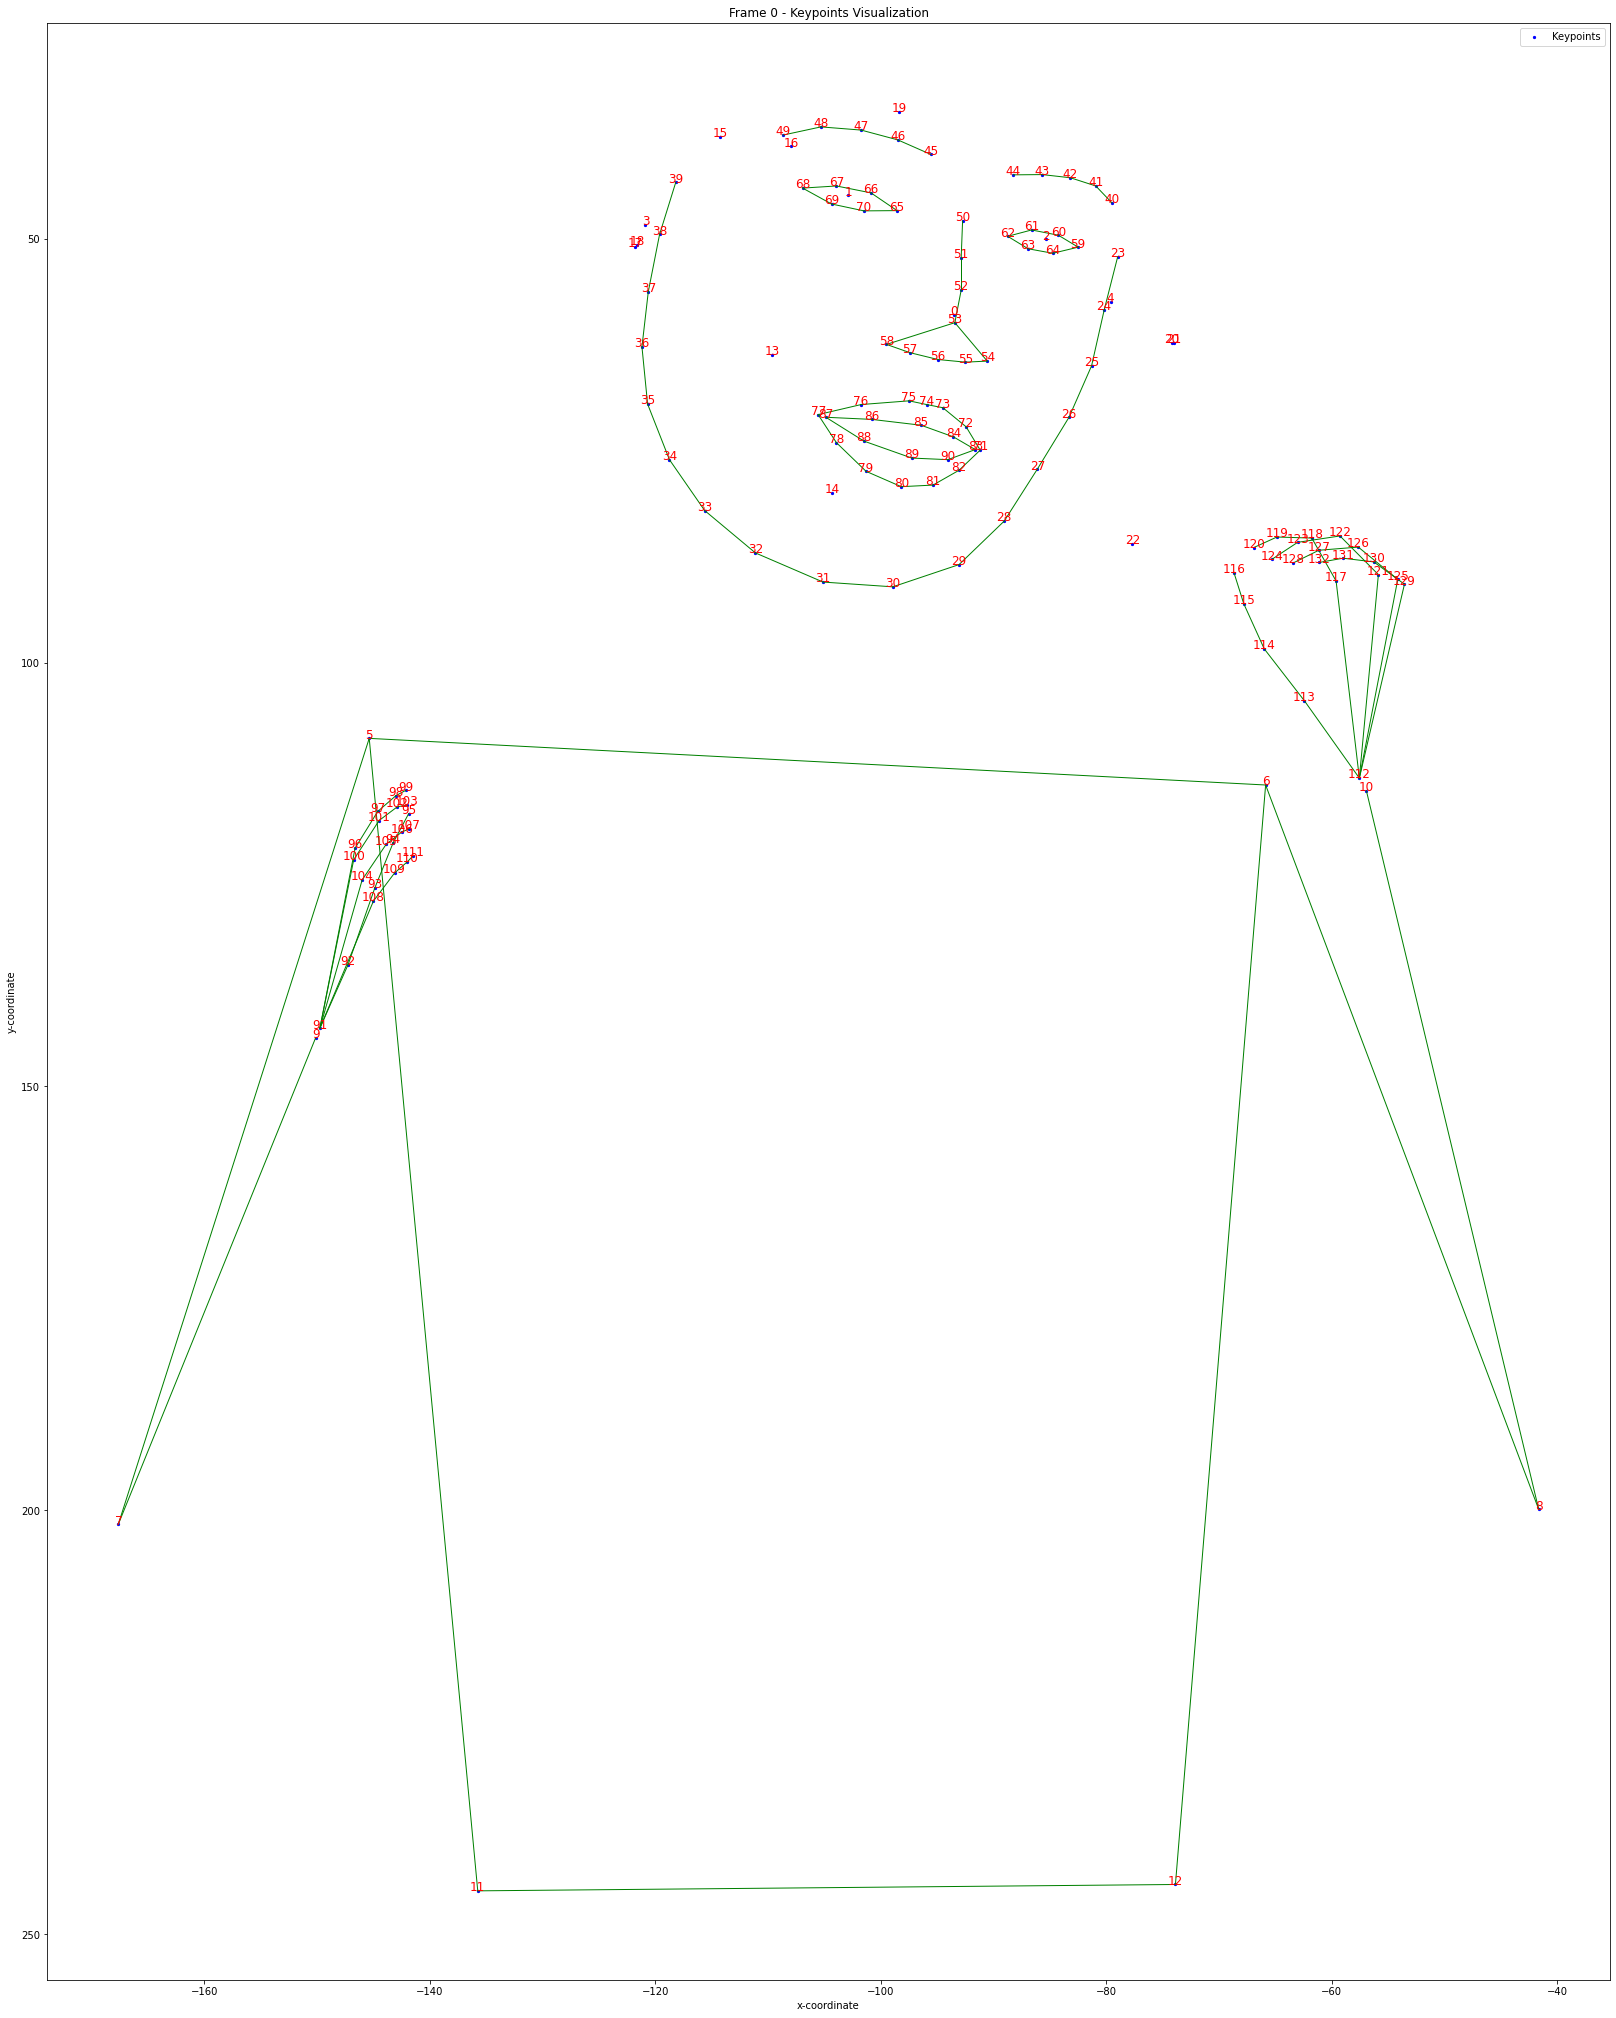

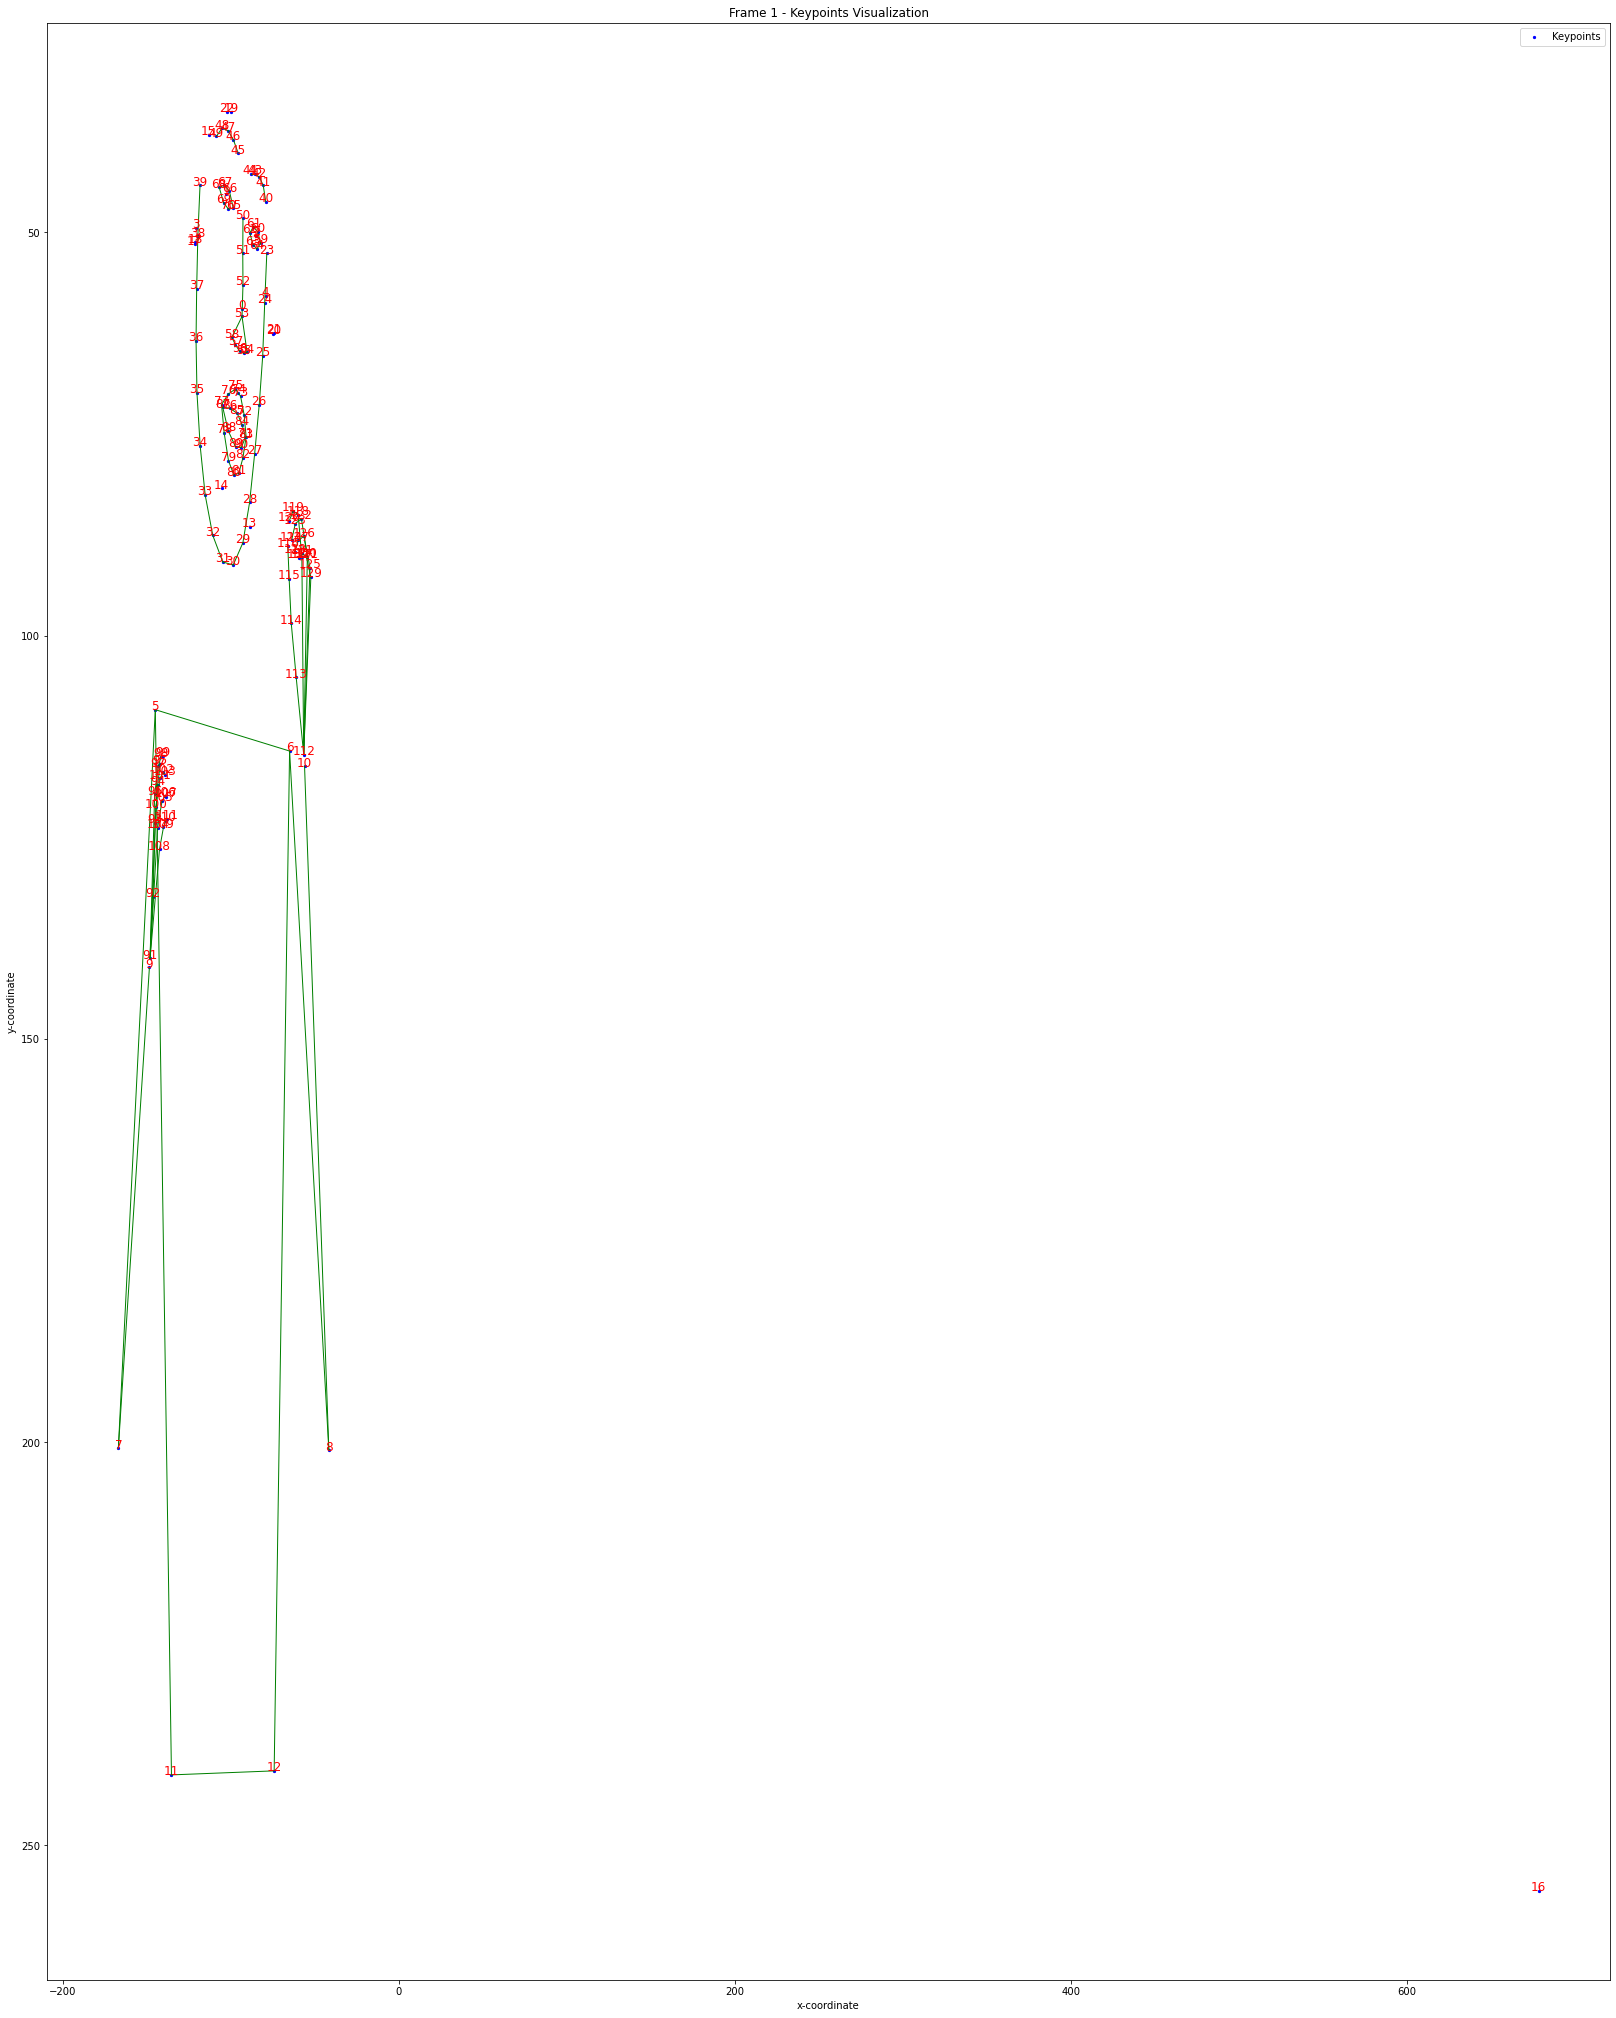

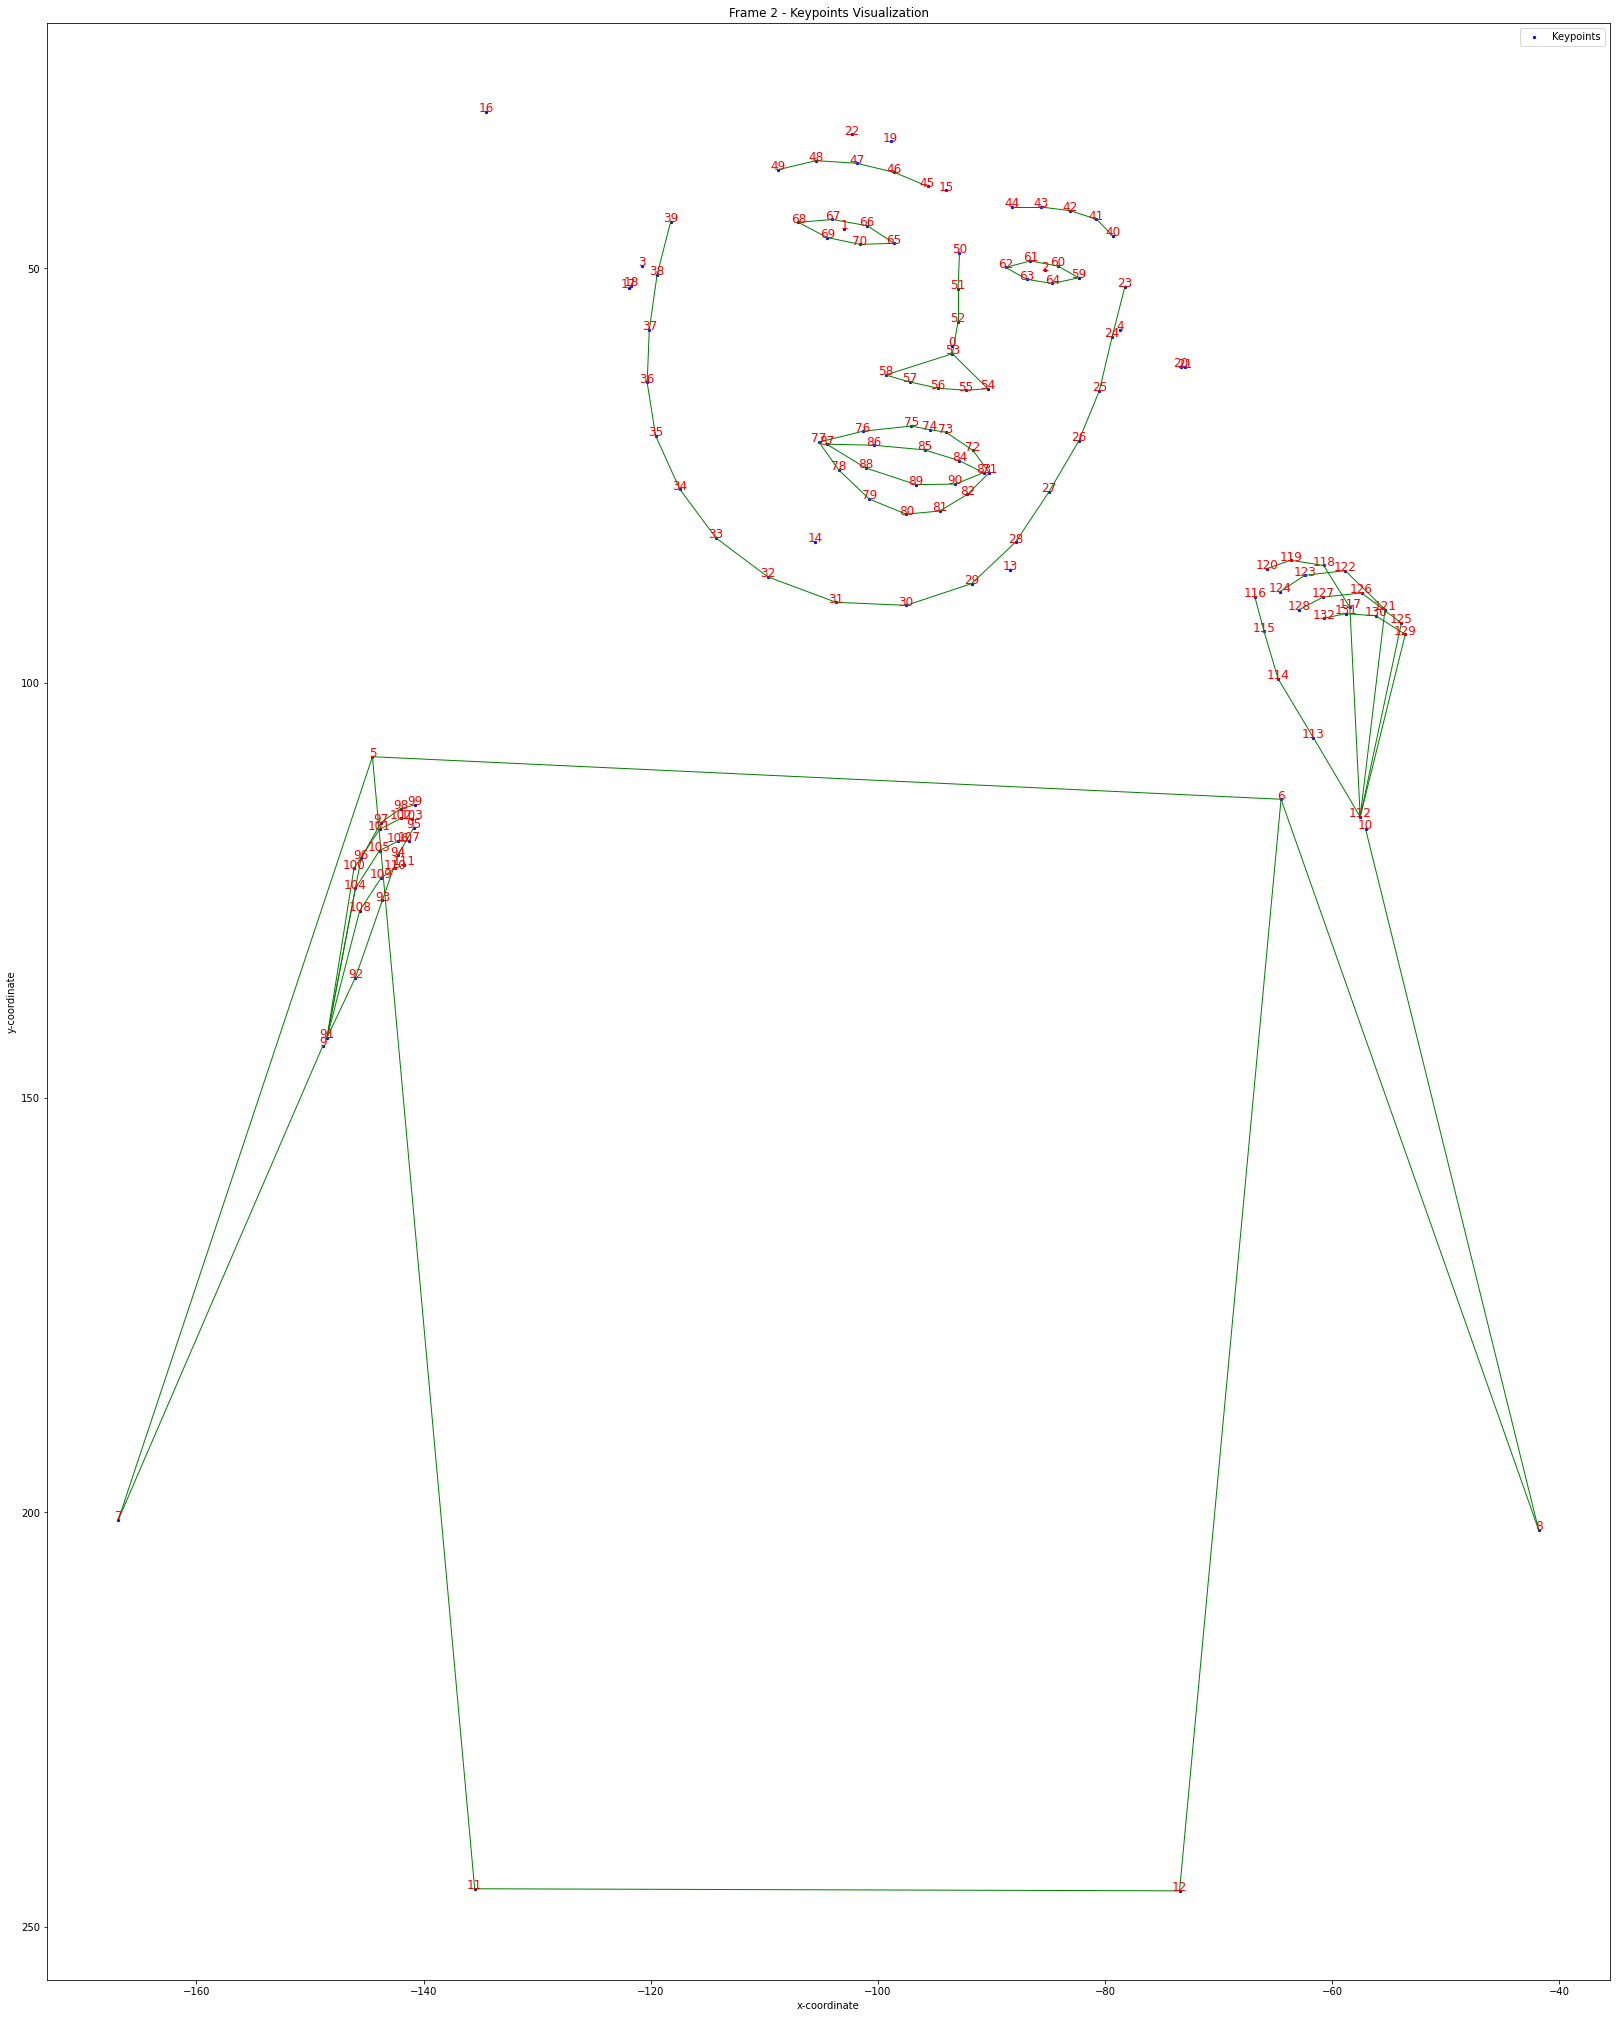

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Updated Skeleton Structure
SKELETON = [
    # Body connections
    #(0, 1), (0, 2), (1, 3), (2, 4),  # Head and shoulders
    (5, 6), (5, 7), (6, 8),          # Shoulders to elbows
    (7, 9), (8, 10),                 # Elbows to wrists
    (5, 11), (6, 12), (11, 12),      # Torso
    #(11, 13), (12, 14),              # Hips to knees
    #(13, 15), (14, 16),              # Knees to ankles

    #Left eyes
    (59,60), (60, 61), (61, 62), (62,63), (63, 64), (64, 59),
    
     # Eye brows
    (45, 46), (46, 47), (47, 48), (48, 49),

    #Right eyes
    (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 65),

    #Eye brows
    (40,41), (41,42), (42,43), (43,44),

    #Mouth
    (71,72), (72,73),(73,74), (74,75), (75,76), (76,77), (77,78), (78,79), (79,80), (80,81), (81,82), (82,71),

    #Mouth inner
    (83,84), (84,85), (85,86), (86,87), (87,88), (88,89), (89,90), (90, 83),


    #Nouse
    (50, 51), (51,52), (52,53), (53, 54), (54,55), (55,56), (56,57), (57,58), (58,53),

    #Face 
    (23,24), (24,25), (25,26), (26,27), (27,28), (28,29), (29,30), (30,31), (31,32), (32,33), (33,34), (34,35), (35,36), (36,37), (37,38), (38,39), 

    # Right Hand Connections
    (91, 92), (92, 93), (93, 94), (94, 95),  # Thumb
    (91, 96), (96, 97), (97, 98), (98, 99),  # Index finger
    (91, 100), (100, 101), (101, 102), (102, 103),  # Middle finger
    (91, 104), (104, 105), (105, 106), (106, 107),  # Ring finger
    (91, 108), (108, 109), (109, 110), (110, 111),  # Little finger

    # Left Hand Connections
    (112, 113), (113, 114), (114, 115), (115, 116),  # Thumb
    (112, 117), (117, 118), (118, 119), (119, 120),  # Index finger
    (112, 121), (121, 122), (122, 123), (123, 124),  # Middle finger
    (112, 125), (125, 126), (126, 127), (127, 128),  # Ring finger
    (112, 129), (129, 130), (130, 131), (131, 132)   # Little finger
]

# Function to rotate keypoints by 180 degrees
def rotate_keypoints_180(keypoints):
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]  # Invert x
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]  # Invert y
    return rotated_keypoints

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize for a specific video file
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Iterate through each frame, limit to first 10 frames
        for frame_index, frame_keypoints in enumerate(keypoints[76:79]):  # Limit to first 10 frames
            # Rotate the keypoints by 180 degrees
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)

            # Create the plot
            plt.figure(figsize=(28, 36))

            # Plot rotated keypoints (in blue)
            plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='blue', s=5, label='Keypoints')

            # Add numbers for each keypoint
            for i, (x, y, c) in enumerate(rotated_keypoints):
                plt.text(x, -y, f'{i}', fontsize=12, color='red', ha='center')  # Number each keypoint

            # Add bonds based on the skeleton structure
            for joint_start, joint_end in SKELETON:
                x_start, y_start = rotated_keypoints[joint_start, 0], -rotated_keypoints[joint_start, 1]
                x_end, y_end = rotated_keypoints[joint_end, 0], -rotated_keypoints[joint_end, 1]
                plt.plot([x_start, x_end], [y_start, y_end], color='green', linewidth=1)

            # Customize plot
            plt.title(f"Frame {frame_index} - Keypoints Visualization")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment

            # Show the plot
            plt.show()
        
        # Break out of the loop after visualizing the first 10 frames
        break


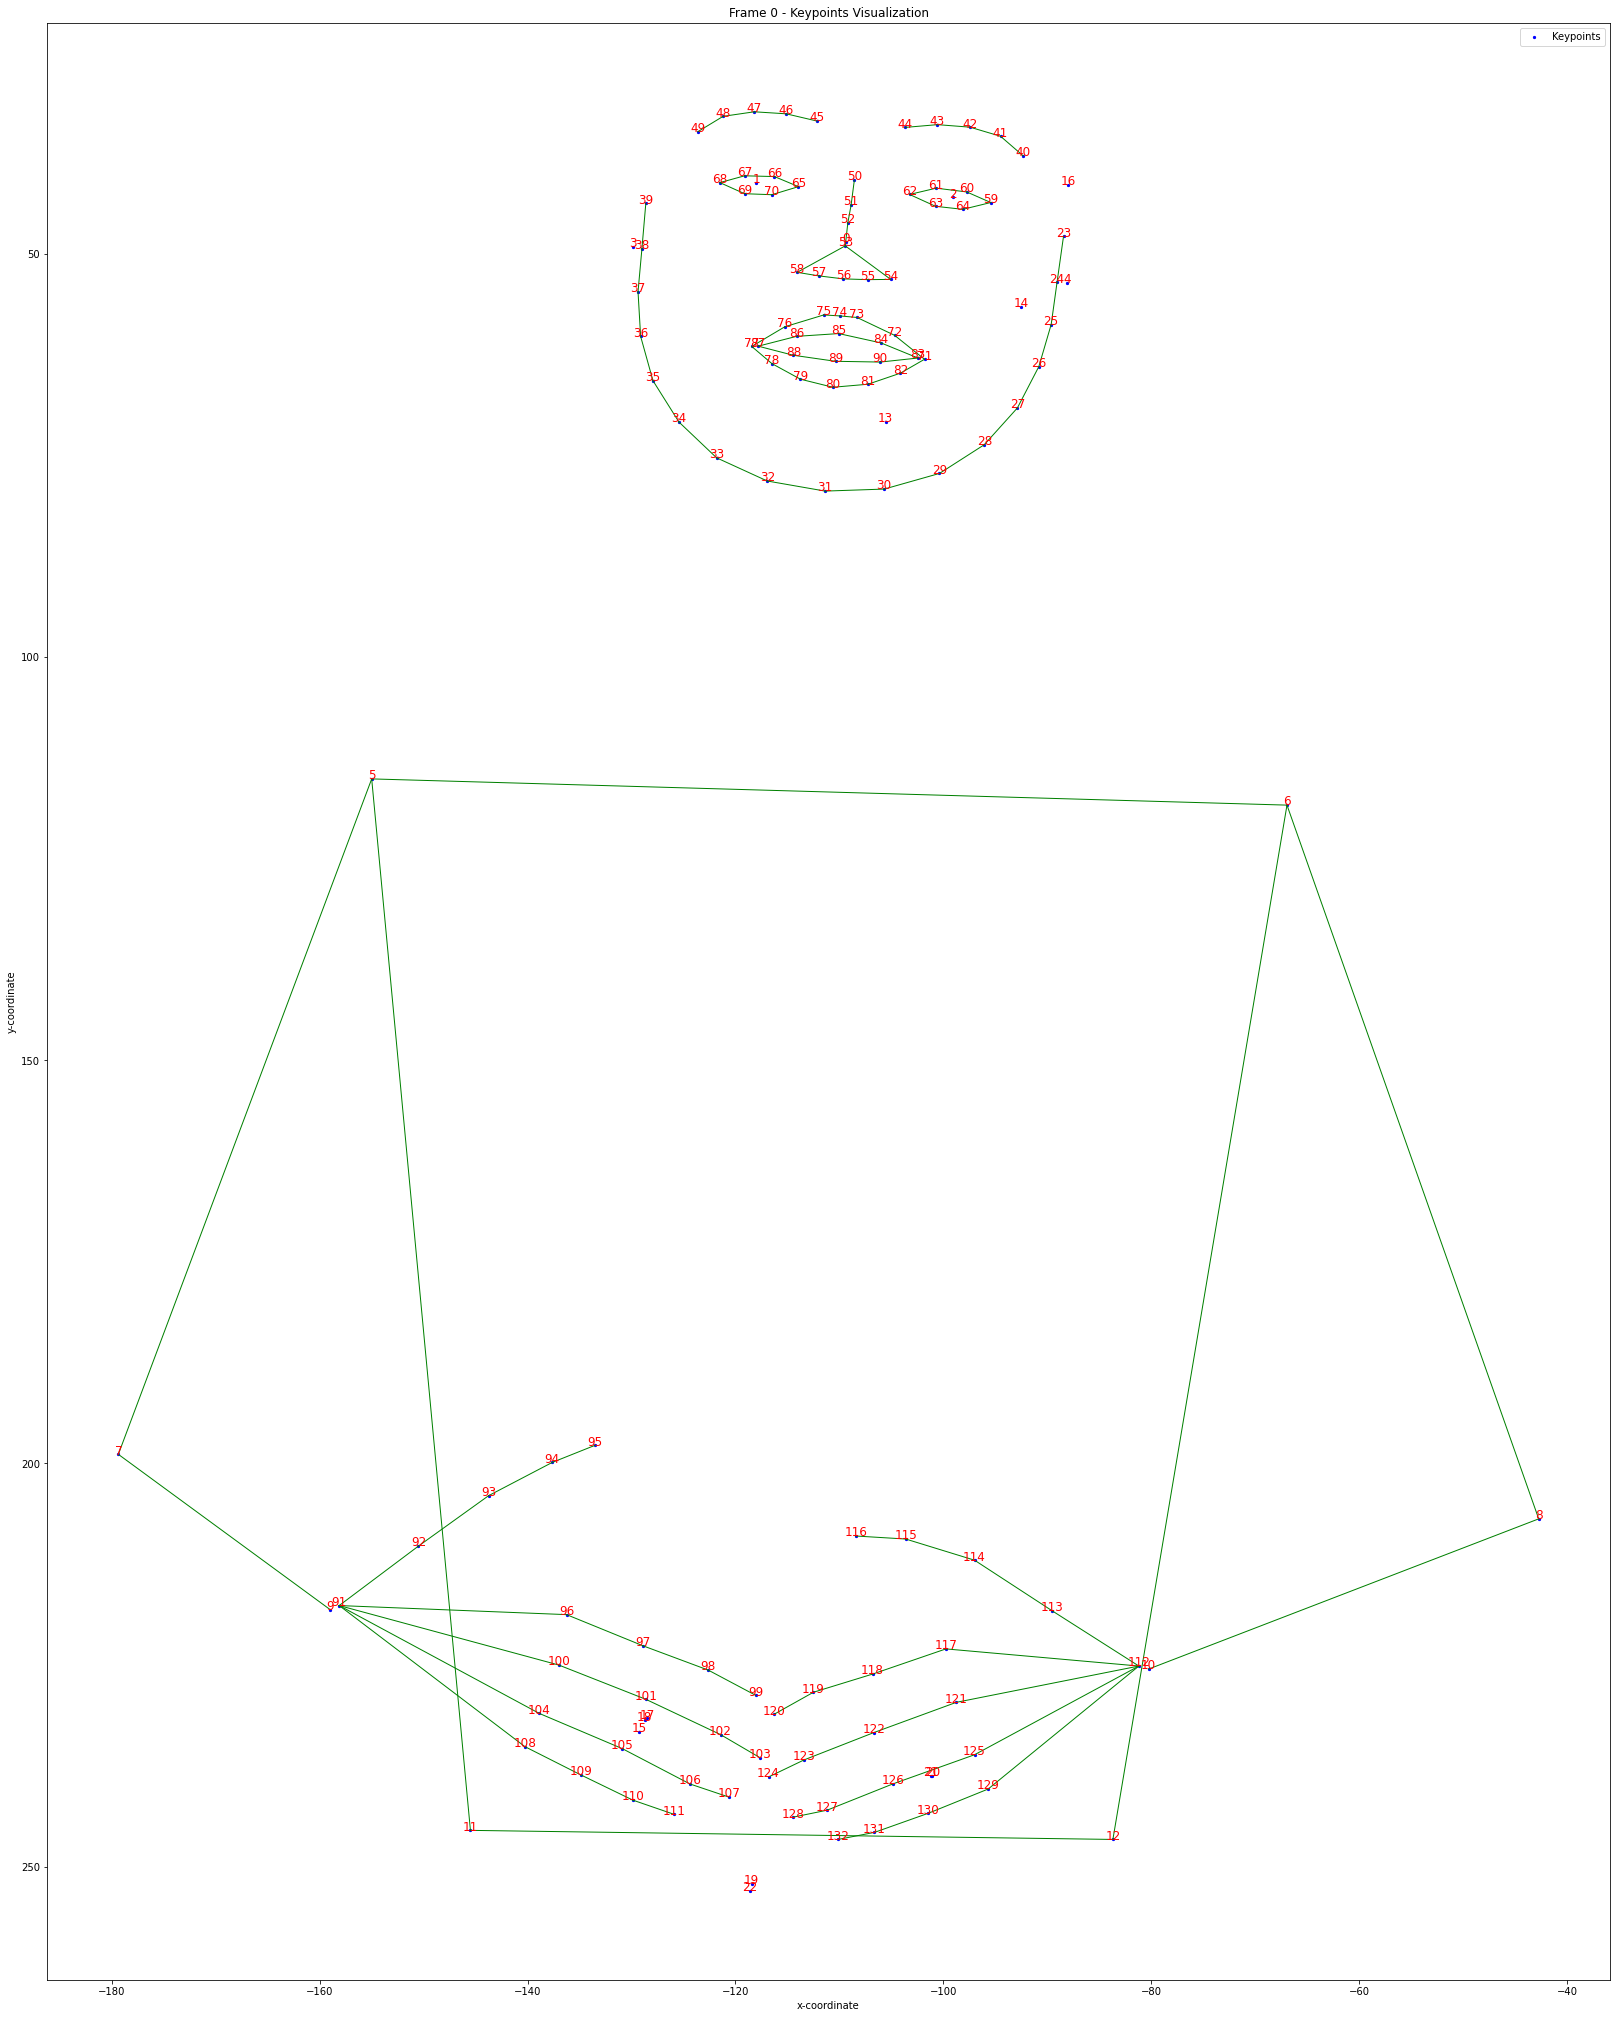

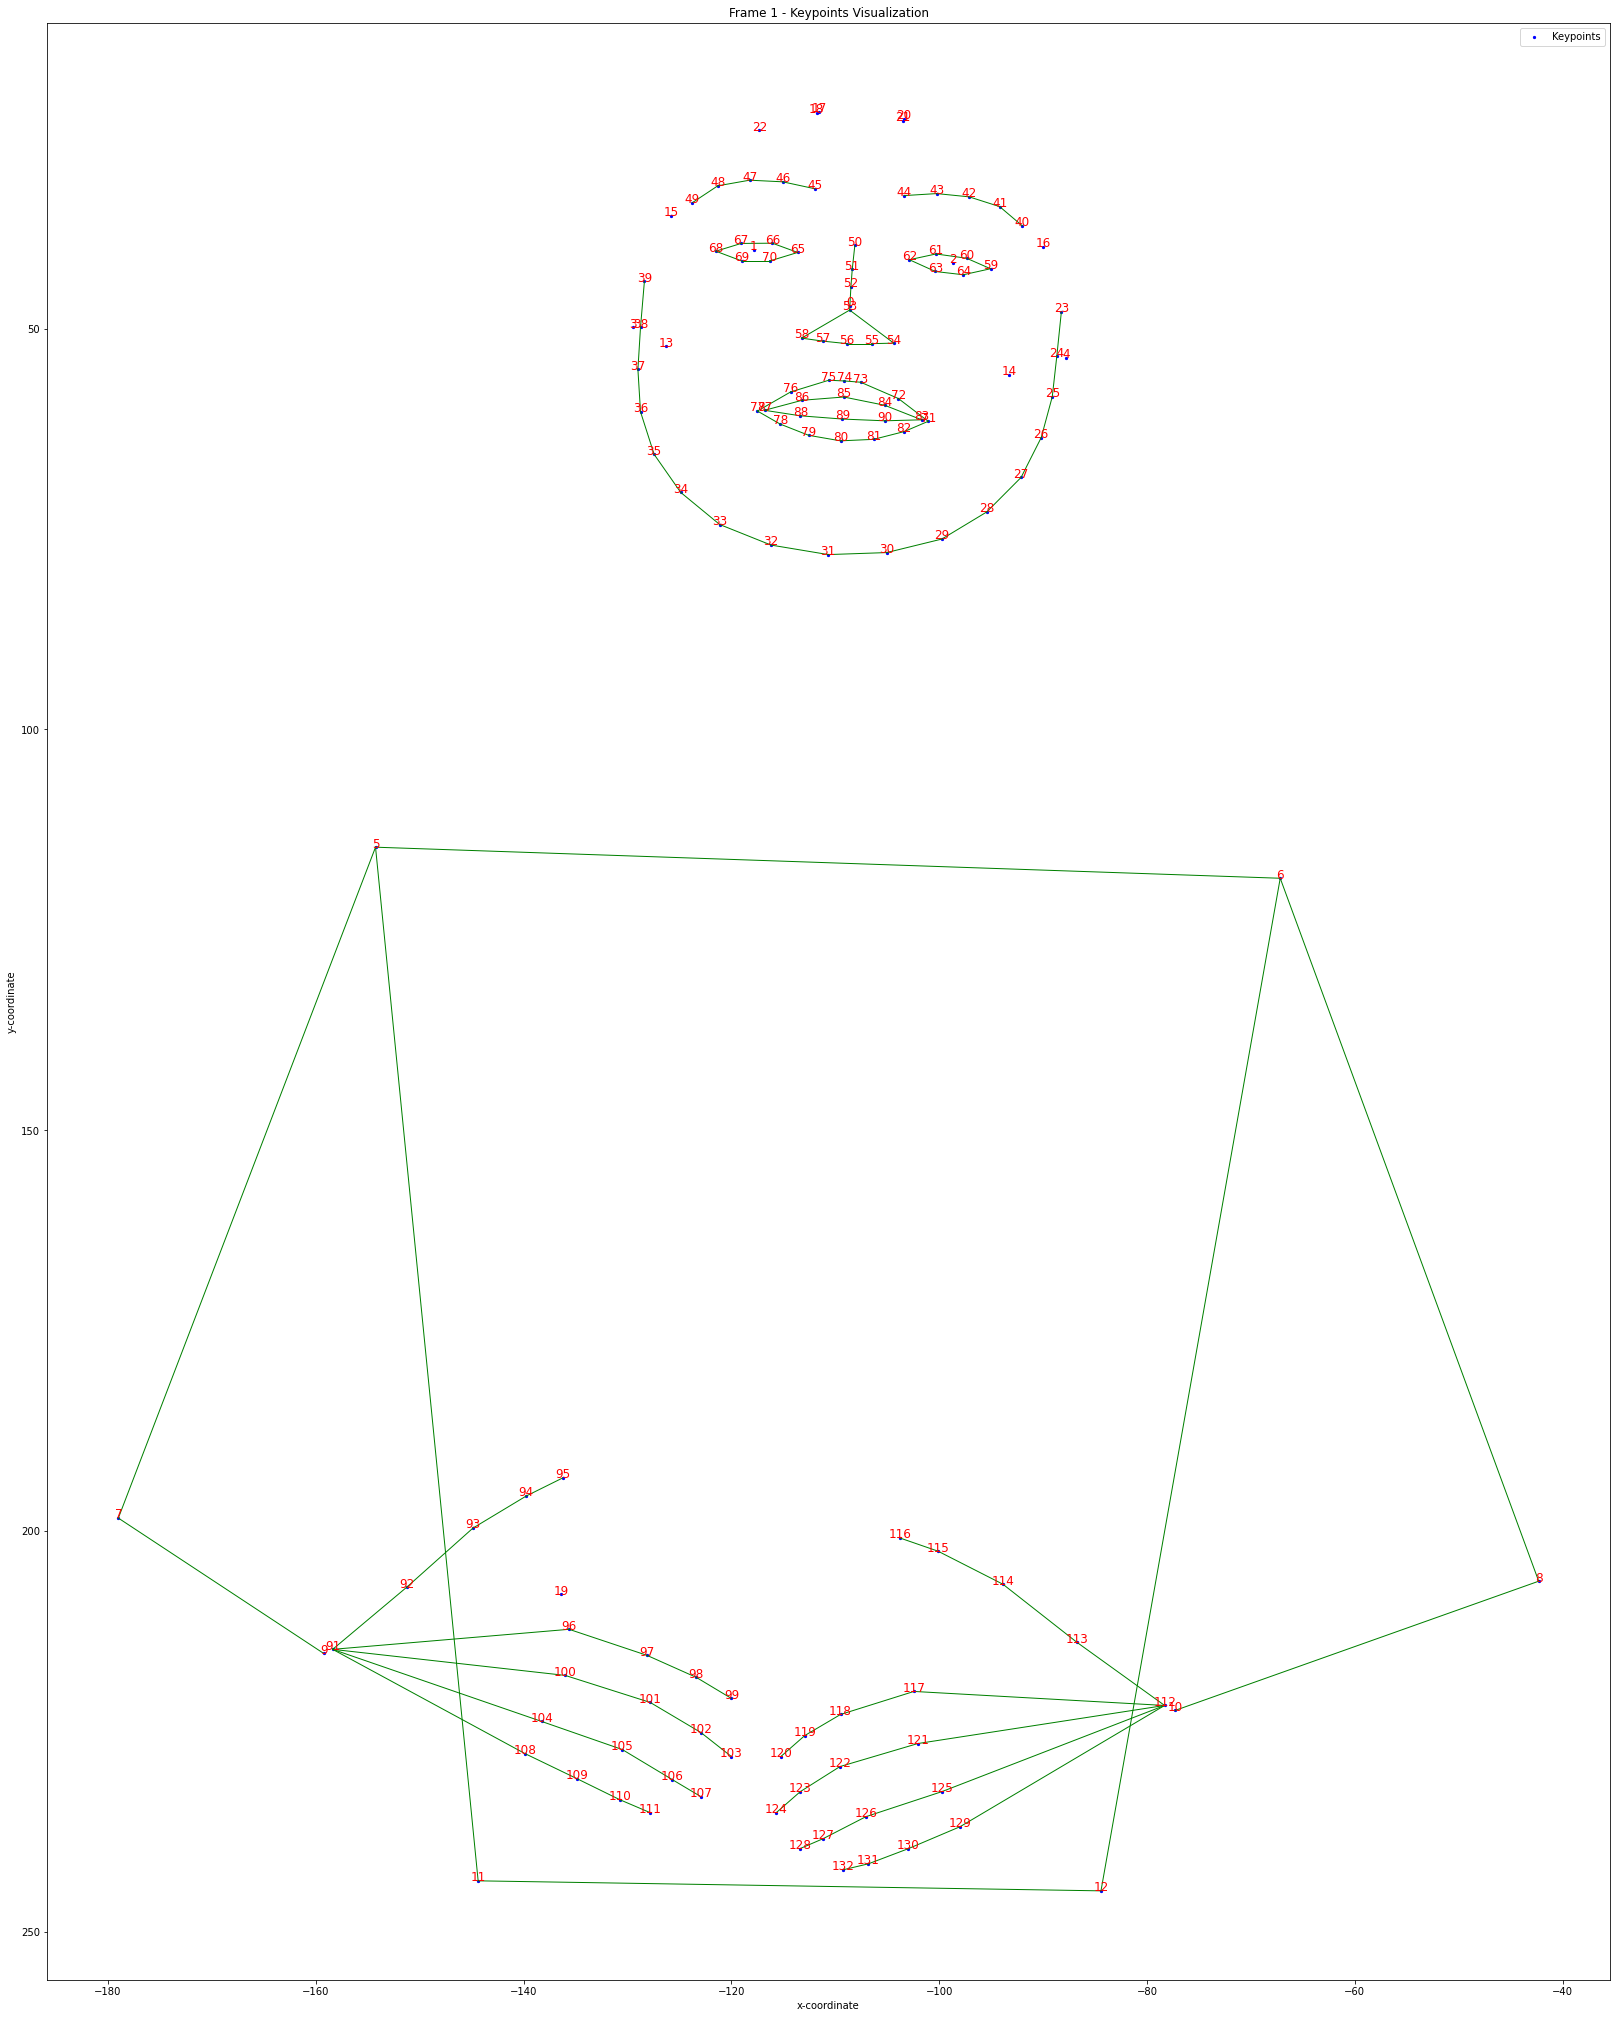

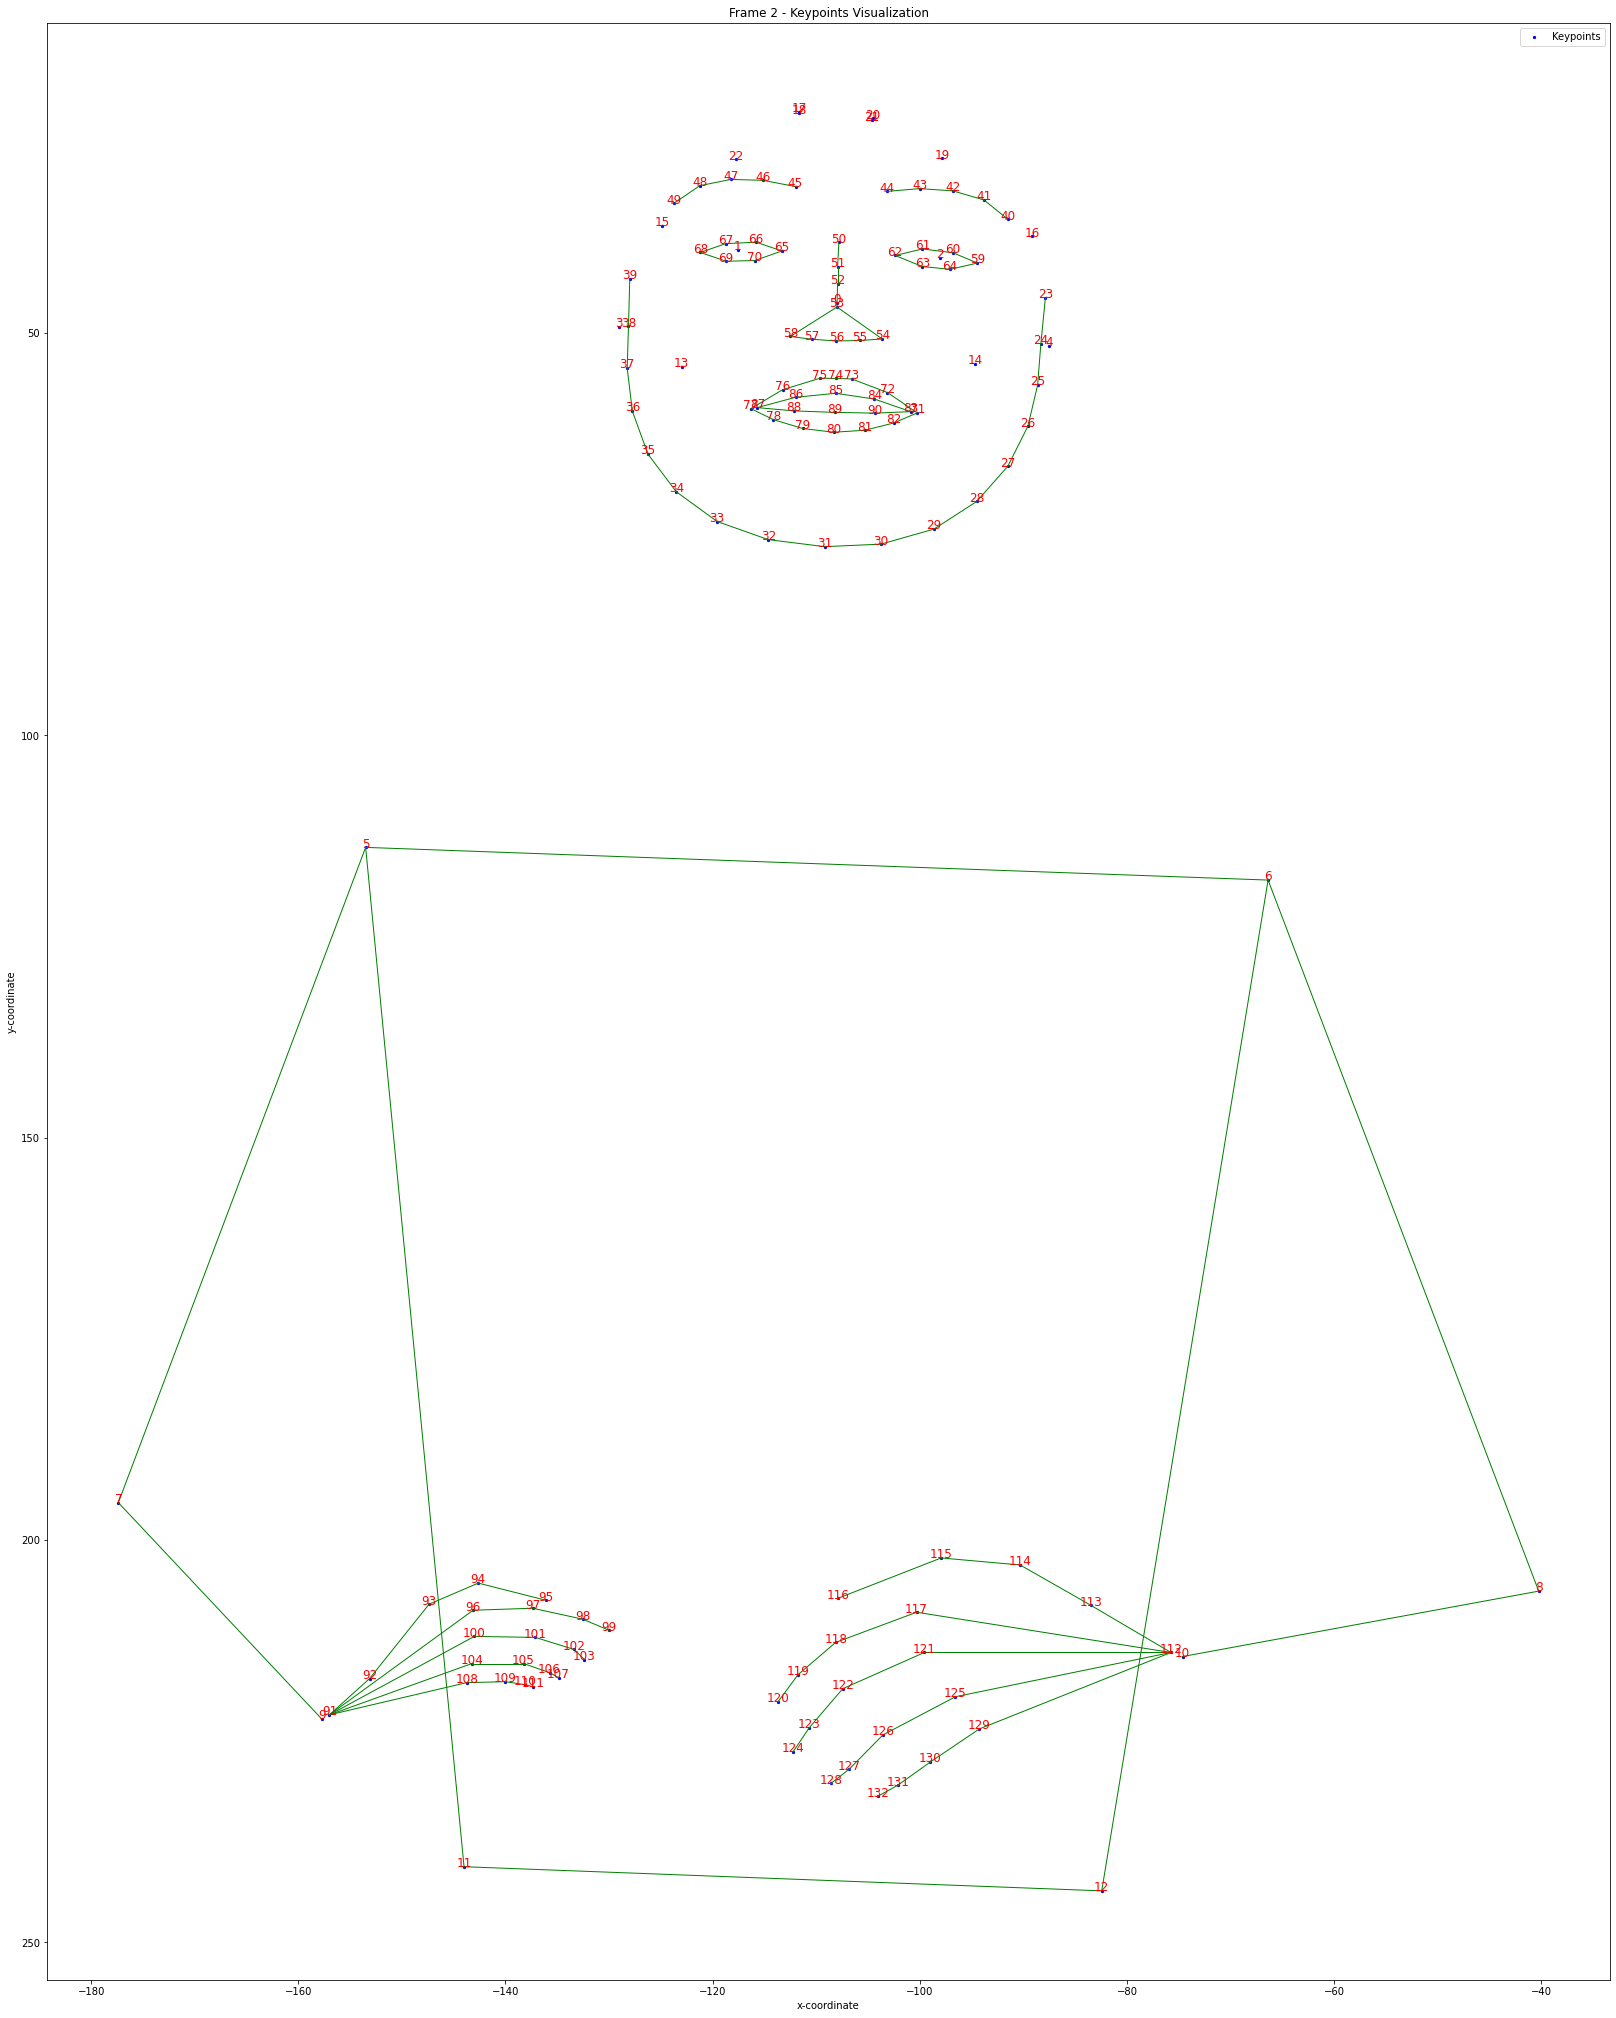

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Updated Skeleton Structure
SKELETON = [
    # Body connections
    #(0, 1), (0, 2), (1, 3), (2, 4),  # Head and shoulders
    (5, 6), (5, 7), (6, 8),          # Shoulders to elbows
    (7, 9), (8, 10),                 # Elbows to wrists
    (5, 11), (6, 12), (11, 12),      # Torso
    #(11, 13), (12, 14),              # Hips to knees
    #(13, 15), (14, 16),              # Knees to ankles

    #Left eyes
    (59,60), (60, 61), (61, 62), (62,63), (63, 64), (64, 59),
    
     # Eye brows
    (45, 46), (46, 47), (47, 48), (48, 49),

    #Right eyes
    (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 65),

    #Eye brows
    (40,41), (41,42), (42,43), (43,44),

    #Mouth
    (71,72), (72,73),(73,74), (74,75), (75,76), (76,77), (77,78), (78,79), (79,80), (80,81), (81,82), (82,71),

    #Mouth inner
    (83,84), (84,85), (85,86), (86,87), (87,88), (88,89), (89,90), (90, 83),


    #Nouse
    (50, 51), (51,52), (52,53), (53, 54), (54,55), (55,56), (56,57), (57,58), (58,53),

    #Face 
    (23,24), (24,25), (25,26), (26,27), (27,28), (28,29), (29,30), (30,31), (31,32), (32,33), (33,34), (34,35), (35,36), (36,37), (37,38), (38,39), 

    # Right Hand Connections
    (91, 92), (92, 93), (93, 94), (94, 95),  # Thumb
    (91, 96), (96, 97), (97, 98), (98, 99),  # Index finger
    (91, 100), (100, 101), (101, 102), (102, 103),  # Middle finger
    (91, 104), (104, 105), (105, 106), (106, 107),  # Ring finger
    (91, 108), (108, 109), (109, 110), (110, 111),  # Little finger

    # Left Hand Connections
    (112, 113), (113, 114), (114, 115), (115, 116),  # Thumb
    (112, 117), (117, 118), (118, 119), (119, 120),  # Index finger
    (112, 121), (121, 122), (122, 123), (123, 124),  # Middle finger
    (112, 125), (125, 126), (126, 127), (127, 128),  # Ring finger
    (112, 129), (129, 130), (130, 131), (131, 132)   # Little finger
]

# Function to rotate keypoints by 180 degrees
def rotate_keypoints_180(keypoints):
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]  # Invert x
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]  # Invert y
    return rotated_keypoints

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize for a specific video file
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Iterate through each frame, limit to first 10 frames
        for frame_index, frame_keypoints in enumerate(keypoints[0:3]):  # Limit to first 10 frames
            # Rotate the keypoints by 180 degrees
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)

            # Create the plot
            plt.figure(figsize=(28, 36))

            # Plot rotated keypoints (in blue)
            plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='blue', s=5, label='Keypoints')

            # Add numbers for each keypoint
            for i, (x, y, c) in enumerate(rotated_keypoints):
                plt.text(x, -y, f'{i}', fontsize=12, color='red', ha='center')  # Number each keypoint

            # Add bonds based on the skeleton structure
            for joint_start, joint_end in SKELETON:
                x_start, y_start = rotated_keypoints[joint_start, 0], -rotated_keypoints[joint_start, 1]
                x_end, y_end = rotated_keypoints[joint_end, 0], -rotated_keypoints[joint_end, 1]
                plt.plot([x_start, x_end], [y_start, y_end], color='green', linewidth=1)

            # Customize plot
            plt.title(f"Frame {frame_index} - Keypoints Visualization")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment

            # Show the plot
            plt.show()
        
        # Break out of the loop after visualizing the first 10 frames
        break


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize for a specific video file
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Iterate through each frame, limit to first 10 frames
        for frame_index, frame_keypoints in enumerate(keypoints[:10]):  # Limit to first 10 frames
            frame_image = load_image(frame_index, video_key)  # Load the corresponding image
            frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

            # Extract thumb keypoints (indices 91 to 95)
            #thumb_keypoints = frame_keypoints[91:96]

            # Create the plot
            plt.figure(figsize=(8, 6))

            # Plot thumb keypoints (in blue)
            plt.scatter(frame_keypoints[:, 0], -frame_keypoints[:, 1], color='blue', s=5, label='frame_keypoints')  # Invert y for correct visualization

            # Add thumb labels T1–T5
            for i, (x, y, c) in enumerate(frame_keypoints):
                plt.text(x, -y, f'T{i+1}', fontsize=8, color='red')  # Invert y for correct placement

            # Customize plot
            plt.title(f"Frame {frame_index} - Thumb Keypoints")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
            plt.show()
        
        # Break out of the loop after visualizing the first 10 frames
        break

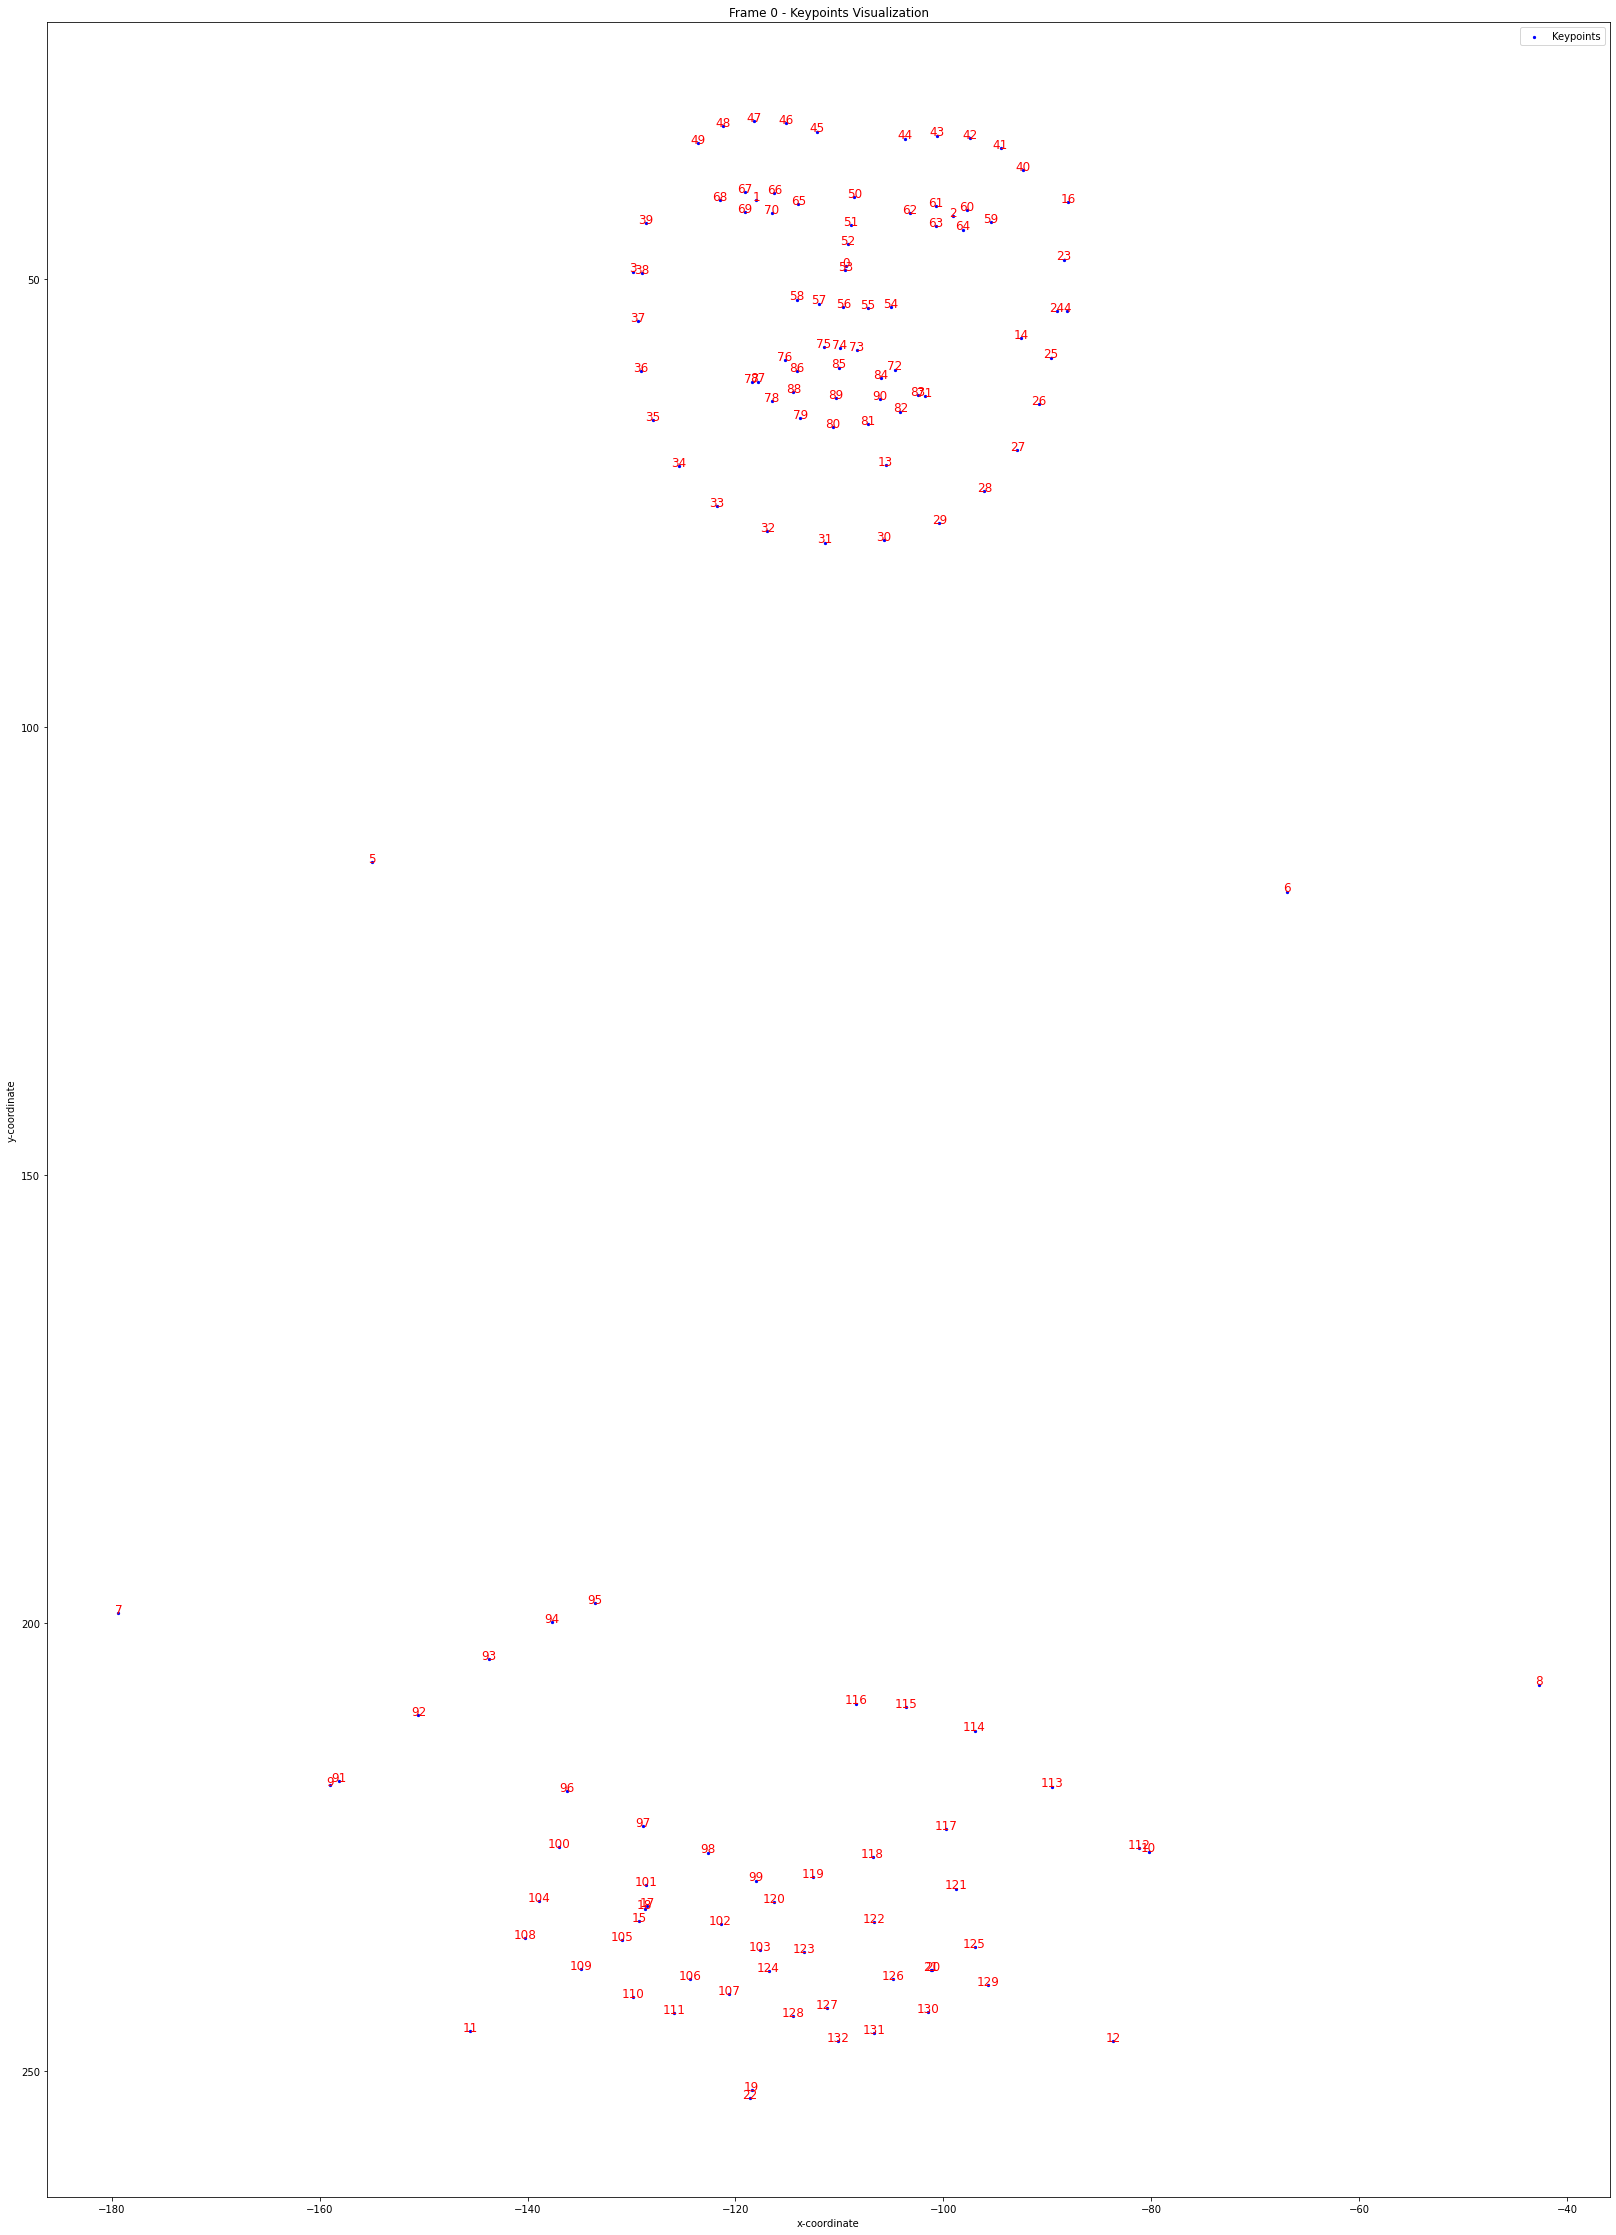

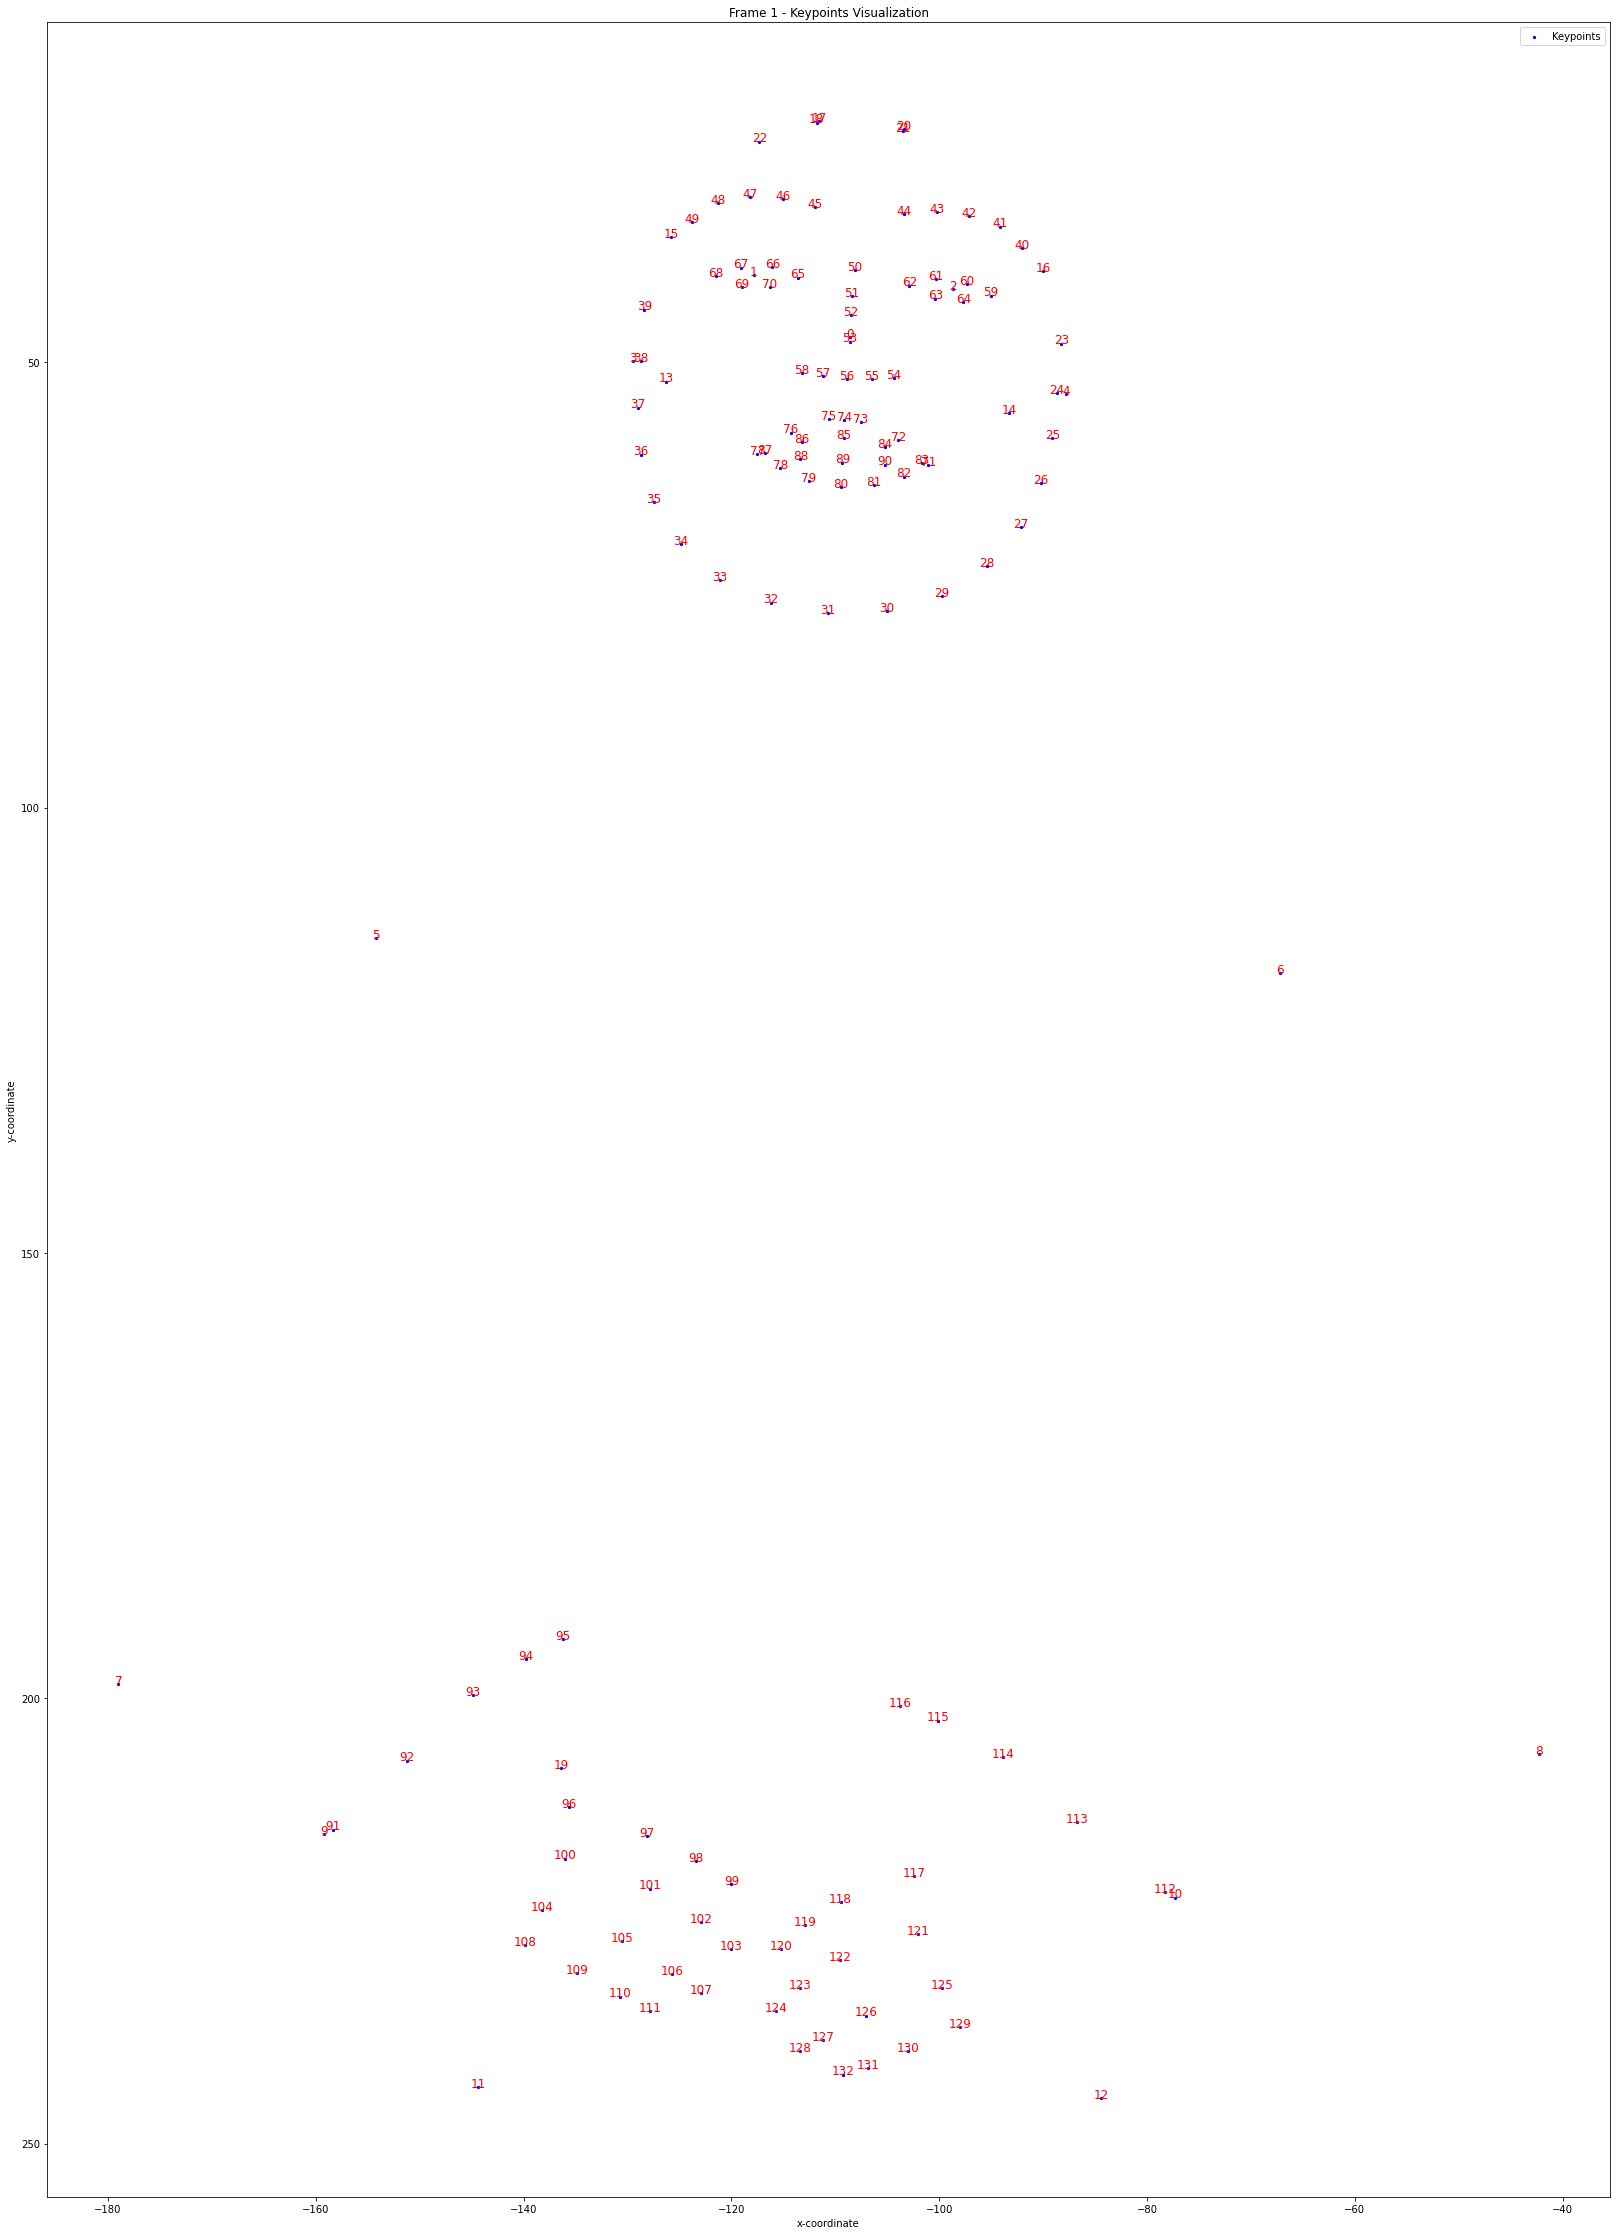

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Function to rotate keypoints by 180 degrees
def rotate_keypoints_180(keypoints):
    # Rotate by 180 degrees by inverting both x and y
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]  # Invert x
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]  # Invert y
    return rotated_keypoints

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize for a specific video file
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Iterate through each frame, limit to first 10 frames
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):  # Limit to first 10 frames
            # Rotate the keypoints by 180 degrees
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)

            # Create the plot
            plt.figure(figsize=(28, 40))

            # Plot rotated keypoints (in blue)
            plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='blue', s=5, label='Keypoints')

            # Add numbers for each keypoint
            for i, (x, y, c) in enumerate(rotated_keypoints):
                plt.text(x, -y, f'{i}', fontsize=12, color='red', ha='center')  # Number each keypoint

            # Customize plot
            plt.title(f"Frame {frame_index} - Keypoints Visualization")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment

            # Show the plot
            plt.show()
        
        # Break out of the loop after visualizing the first 10 frames
        break


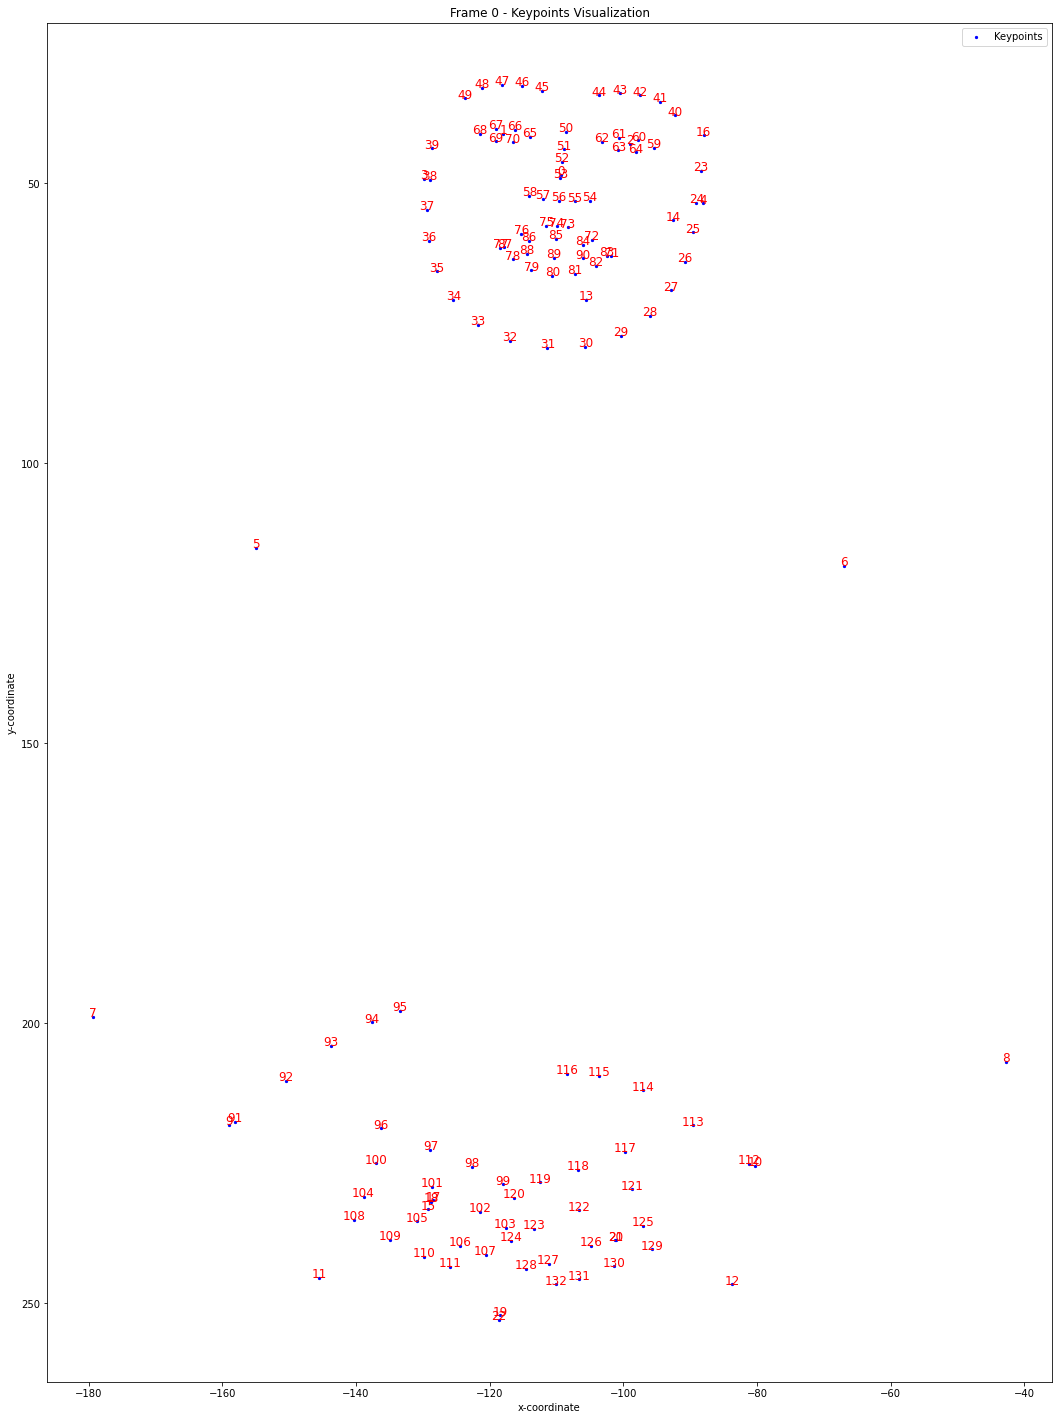

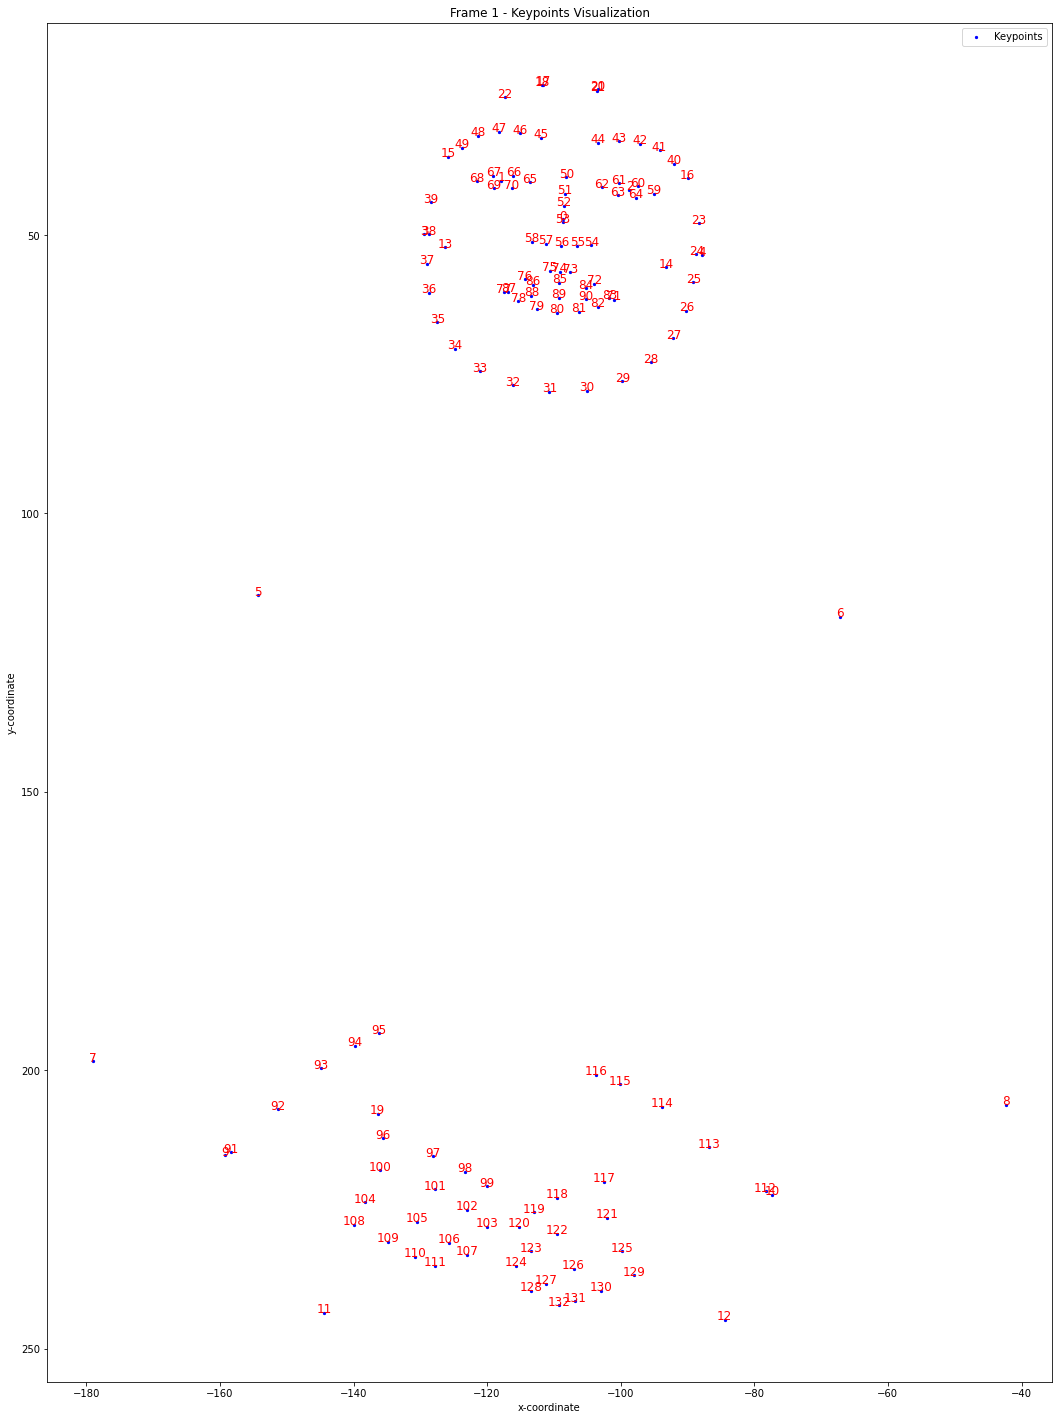

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Function to rotate keypoints by 180 degrees
def rotate_keypoints_180(keypoints):
    # Rotate by 180 degrees by inverting both x and y
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]  # Invert x
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]  # Invert y
    return rotated_keypoints

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize for a specific video file
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Iterate through each frame, limit to first 10 frames
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):  # Limit to first 10 frames
            # Rotate the keypoints by 180 degrees
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)

            # Create the plot
            plt.figure(figsize=(18, 25))

            # Plot rotated keypoints (in blue)
            plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='blue', s=5, label='Keypoints')

            # Add numbers for each keypoint
            for i, (x, y, c) in enumerate(rotated_keypoints):
                plt.text(x, -y, f'{i}', fontsize=12, color='red', ha='center')  # Number each keypoint

            # Customize plot
            plt.title(f"Frame {frame_index} - Keypoints Visualization")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment

            # Show the plot
            plt.show()
        
        # Break out of the loop after visualizing the first 10 frames
        break


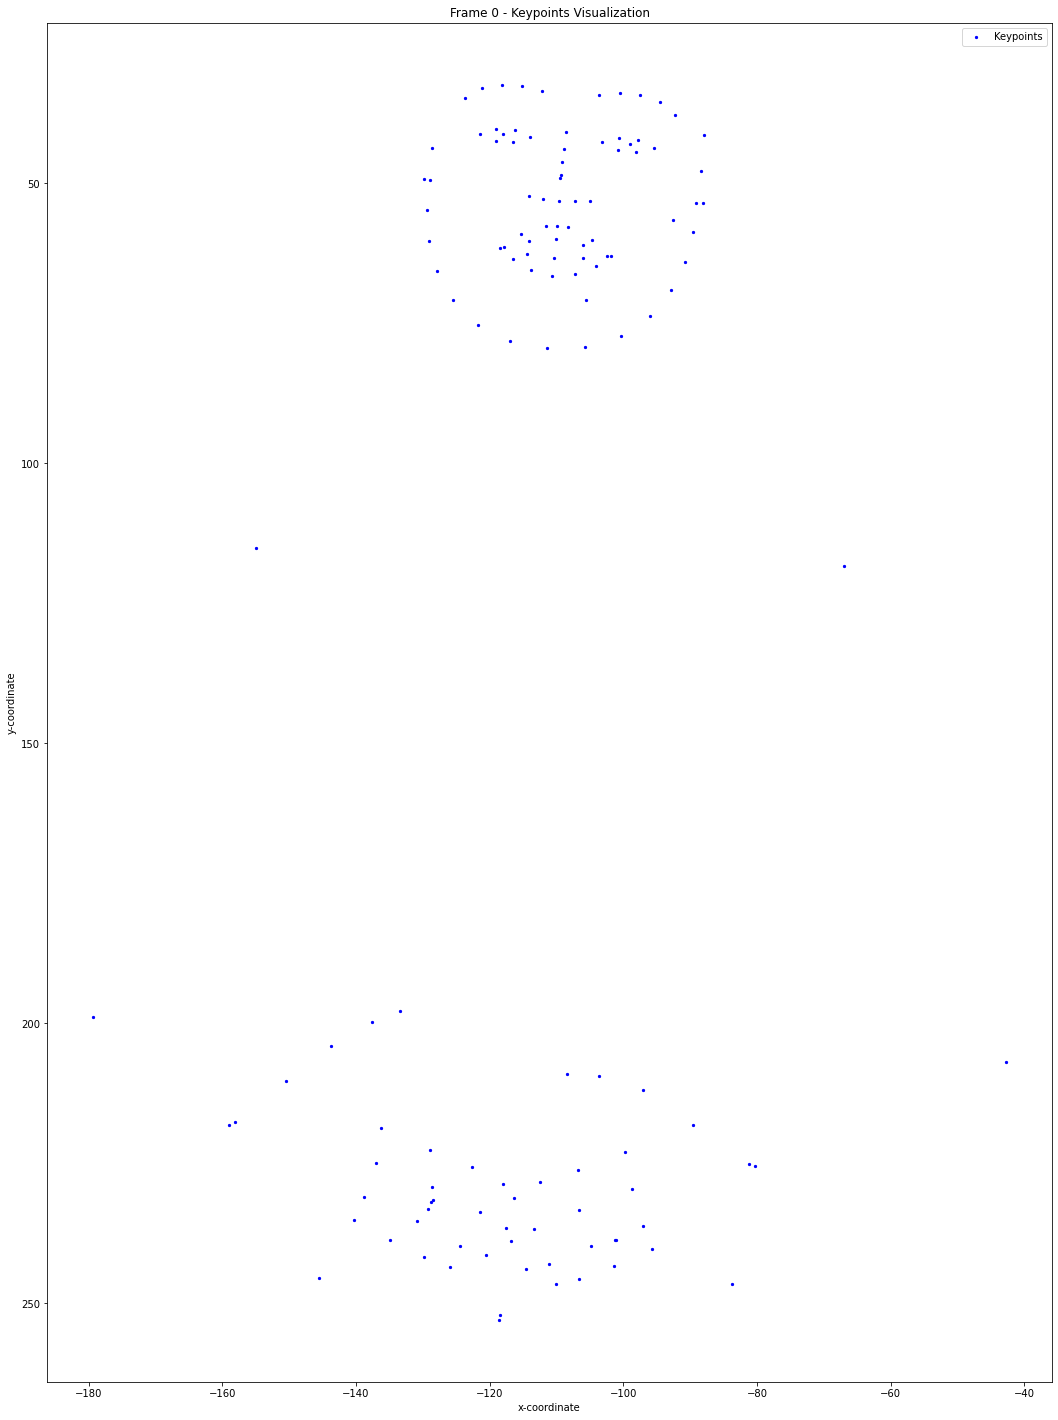

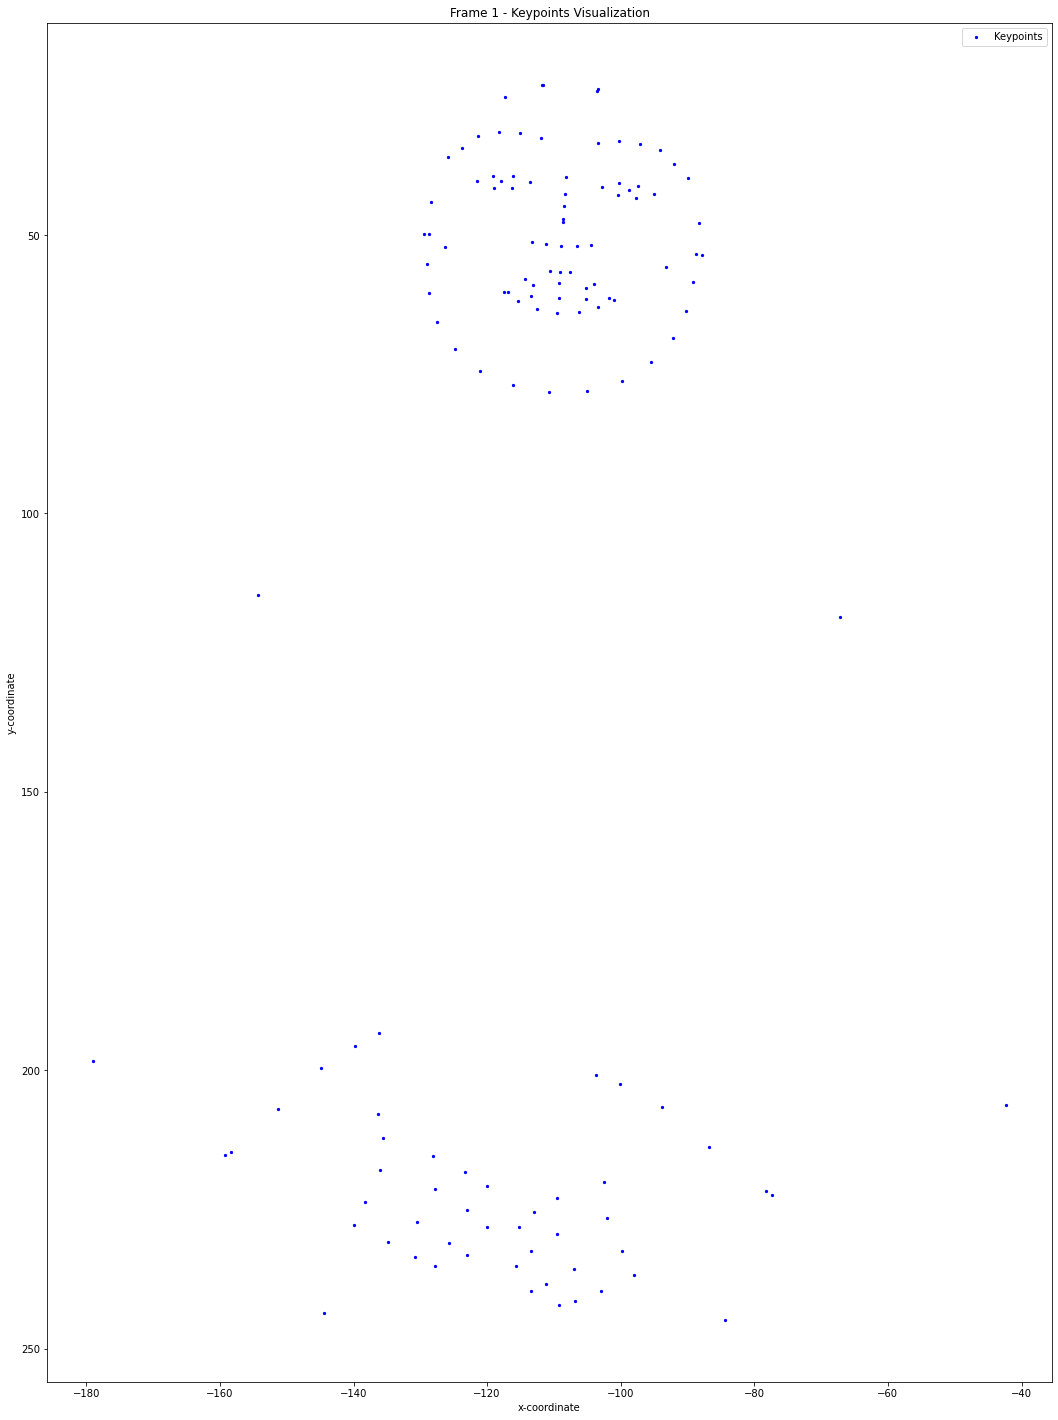

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Function to rotate keypoints by 180 degrees
def rotate_keypoints_180(keypoints):
    # Rotate by 180 degrees by inverting both x and y
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]  # Invert x
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]  # Invert y
    return rotated_keypoints

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize for a specific video file
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Iterate through each frame, limit to first 2 frames
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):  # Limit to first 2 frames
            # Rotate the keypoints by 180 degrees
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)

            # Create the plot
            plt.figure(figsize=(18, 25))

            # Plot rotated keypoints (in blue)
            plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='blue', s=5, label='Keypoints')

            # Customize plot
            plt.title(f"Frame {frame_index} - Keypoints Visualization")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment

            # Show the plot
            plt.show()

        # Break out of the loop after visualizing the first 2 frames
        break


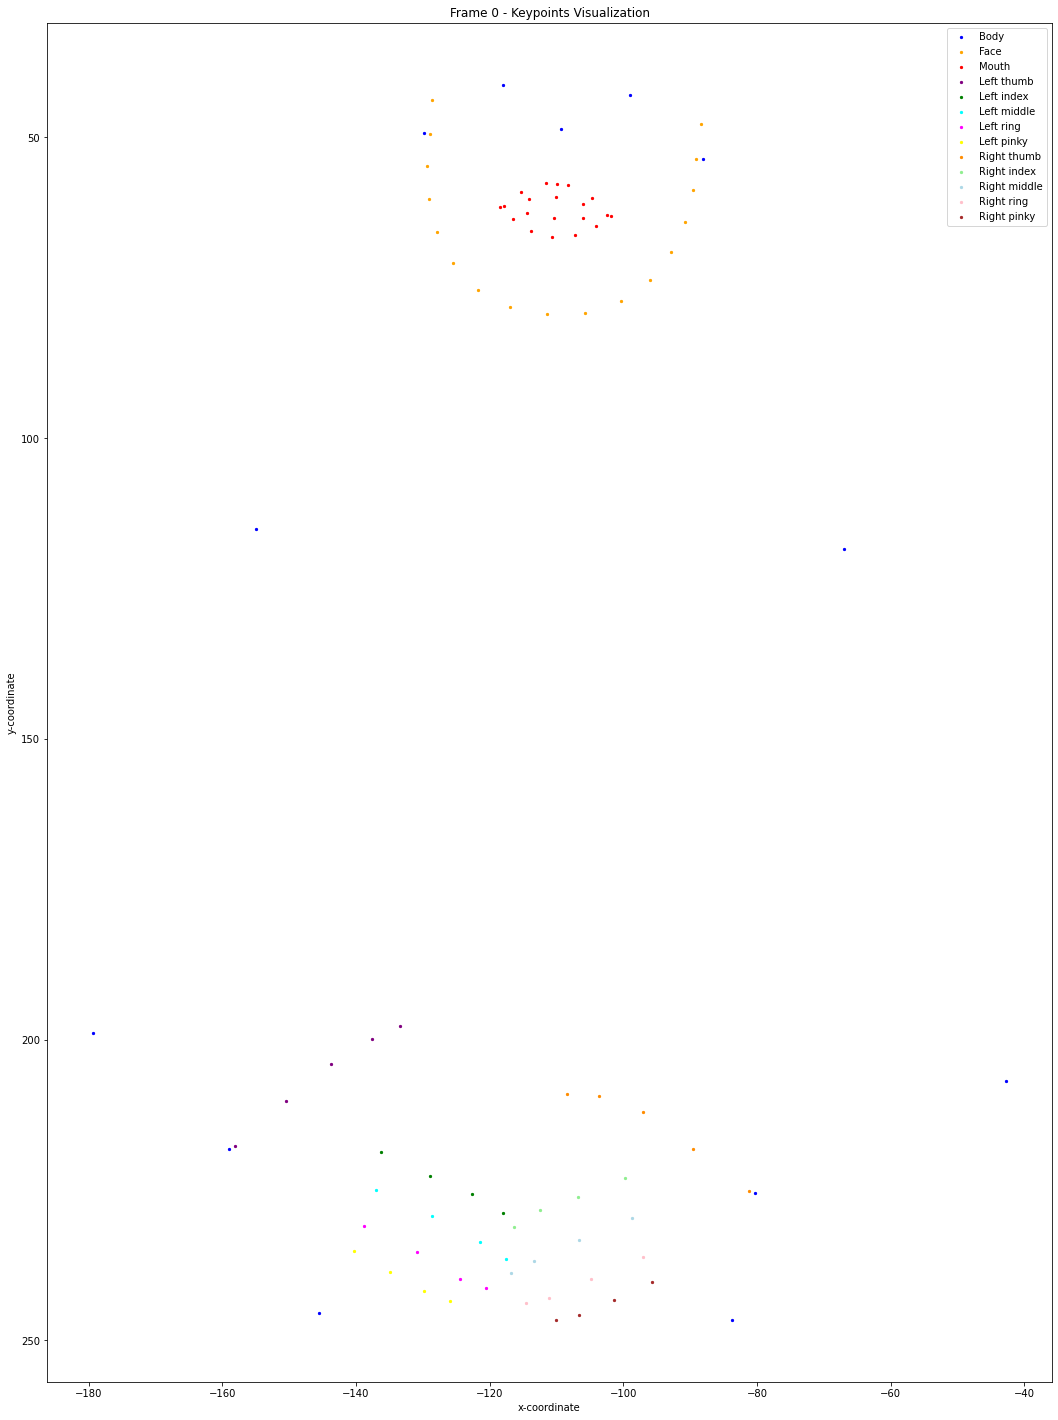

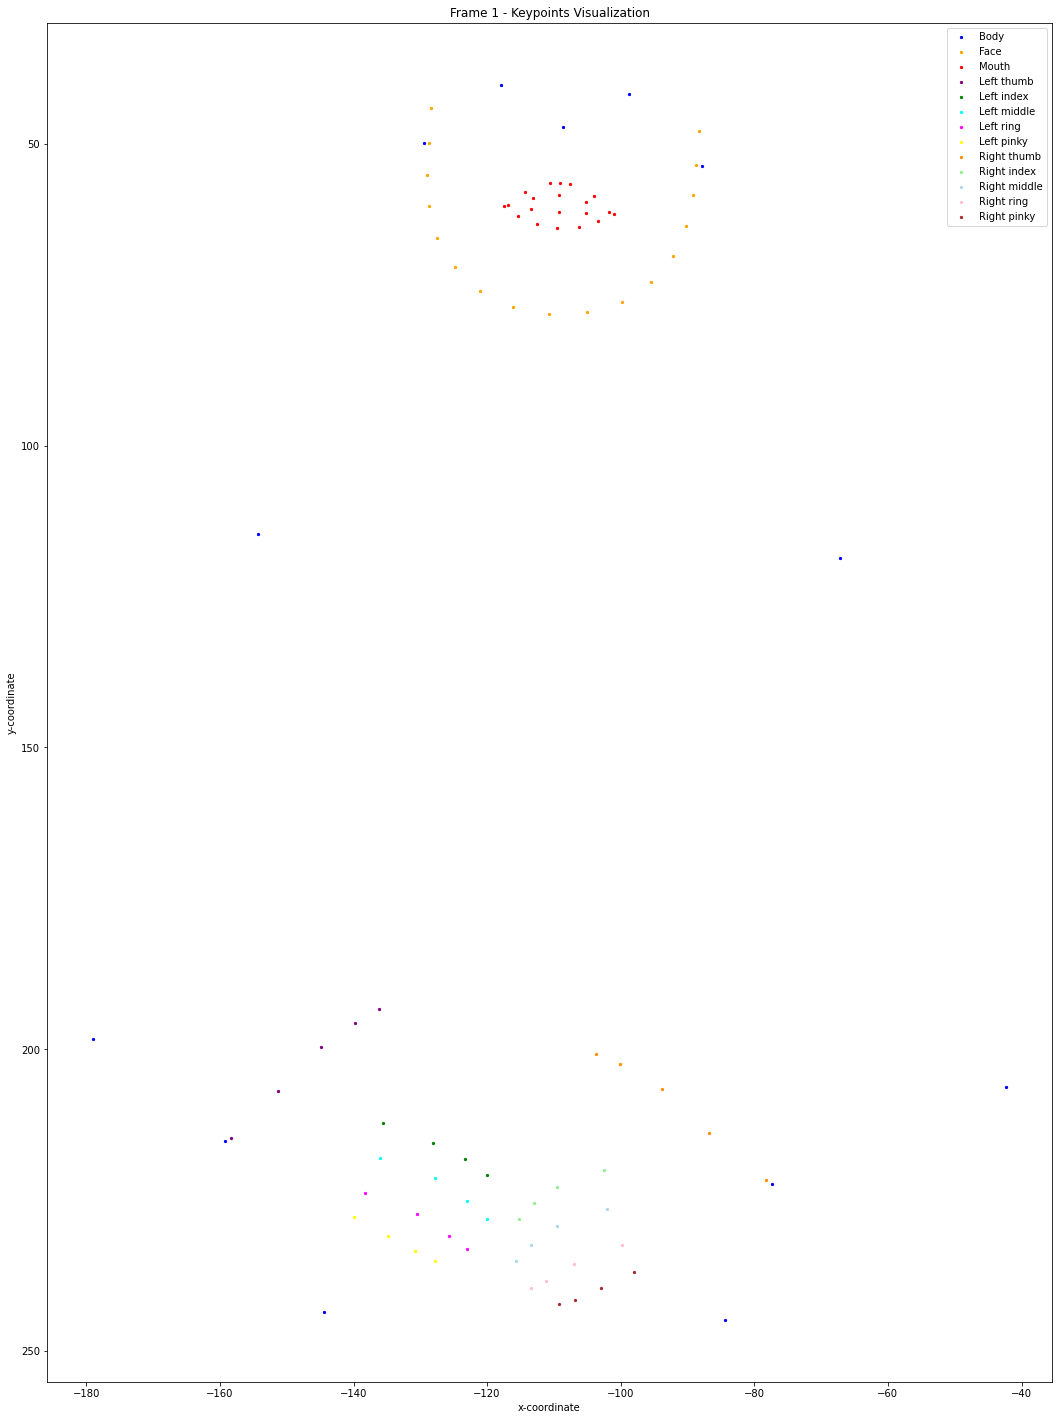

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the exact indices for each body part based on your specifications
body_parts_indices = {
    "body": list(range(0, 13)),
    "face": list(range(23, 40)),
    "mouth": list(range(71, 91)),
    "left_thumb": list(range(91, 96)),
    "left_index": list(range(96, 100)),
    "left_middle": list(range(100, 104)),
    "left_ring": list(range(104, 108)),
    "left_pinky": list(range(108, 112)),
    "right_thumb": list(range(112, 117)),
    "right_index": list(range(117, 121)),
    "right_middle": list(range(121, 125)),
    "right_ring": list(range(125, 129)),
    "right_pinky": list(range(129, 133)),
}

# Assign colors for each body part for easy visualization
body_parts_colors = {
    "body": "blue",
    "face": "orange",
    "mouth": "red",
    "left_thumb": "purple",
    "left_index": "green",
    "left_middle": "cyan",
    "left_ring": "magenta",
    "left_pinky": "yellow",
    "right_thumb": "darkorange",
    "right_index": "lightgreen",
    "right_middle": "lightblue",
    "right_ring": "pink",
    "right_pinky": "brown",
}

# Function to rotate keypoints by 180 degrees
def rotate_keypoints_180(keypoints):
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]  # Invert x
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]  # Invert y
    return rotated_keypoints

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize for a specific video file
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Iterate through each frame, limit to first 2 frames
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):  # Limit to first 2 frames
            # Rotate the keypoints by 180 degrees
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)

            # Create the plot
            plt.figure(figsize=(18, 25))
            plt.title(f"Frame {frame_index} - Keypoints Visualization")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')

            # Plot each body part with its respective color
            for part, indices in body_parts_indices.items():
                part_keypoints = rotated_keypoints[indices]
                plt.scatter(part_keypoints[:, 0], -part_keypoints[:, 1], 
                            color=body_parts_colors[part], s=5, label=part.replace('_', ' ').capitalize())

            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment

            # Show the plot
            plt.show()

        # Break out of the loop after visualizing the first 2 frames
        break


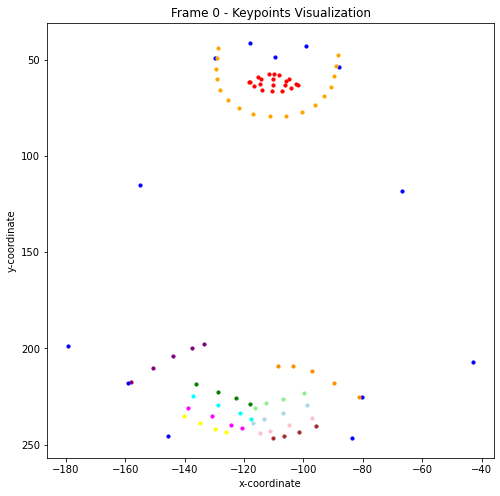

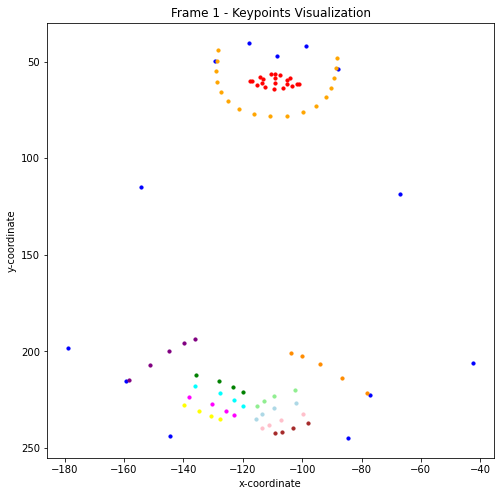

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define the exact indices for each body part based on your specifications
body_parts_indices = {
    "body": list(range(0, 13)),
    "face": list(range(23, 40)),
    "mouth": list(range(71, 91)),
    "left_thumb": list(range(91, 96)),
    "left_index": list(range(96, 100)),
    "left_middle": list(range(100, 104)),
    "left_ring": list(range(104, 108)),
    "left_pinky": list(range(108, 112)),
    "right_thumb": list(range(112, 117)),
    "right_index": list(range(117, 121)),
    "right_middle": list(range(121, 125)),
    "right_ring": list(range(125, 129)),
    "right_pinky": list(range(129, 133)),
}

# Assign colors for each body part for easy visualization
body_parts_colors = {
    "body": "blue",
    "face": "orange",
    "mouth": "red",
    "left_thumb": "purple",
    "left_index": "green",
    "left_middle": "cyan",
    "left_ring": "magenta",
    "left_pinky": "yellow",
    "right_thumb": "darkorange",
    "right_index": "lightgreen",
    "right_middle": "lightblue",
    "right_ring": "pink",
    "right_pinky": "brown",
}

# Function to rotate keypoints by 180 degrees
def rotate_keypoints_180(keypoints):
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]  # Invert x
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]  # Invert y
    return rotated_keypoints

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize for a specific video file
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Iterate through each frame, limit to first 2 frames
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):  # Limit to first 2 frames
            # Rotate the keypoints by 180 degrees
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)

            # Create the plot
            plt.figure(figsize=(8, 8))
            plt.title(f"Frame {frame_index} - Keypoints Visualization")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')

            # Plot each body part with its respective color
            for part, indices in body_parts_indices.items():
                part_keypoints = rotated_keypoints[indices]
                plt.scatter(part_keypoints[:, 0], -part_keypoints[:, 1], 
                            color=body_parts_colors[part], s=10, label=part.replace('_', ' ').capitalize())

            #plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment

            # Show the plot
            plt.show()

        # Break out of the loop after visualizing the first 2 frames
        break


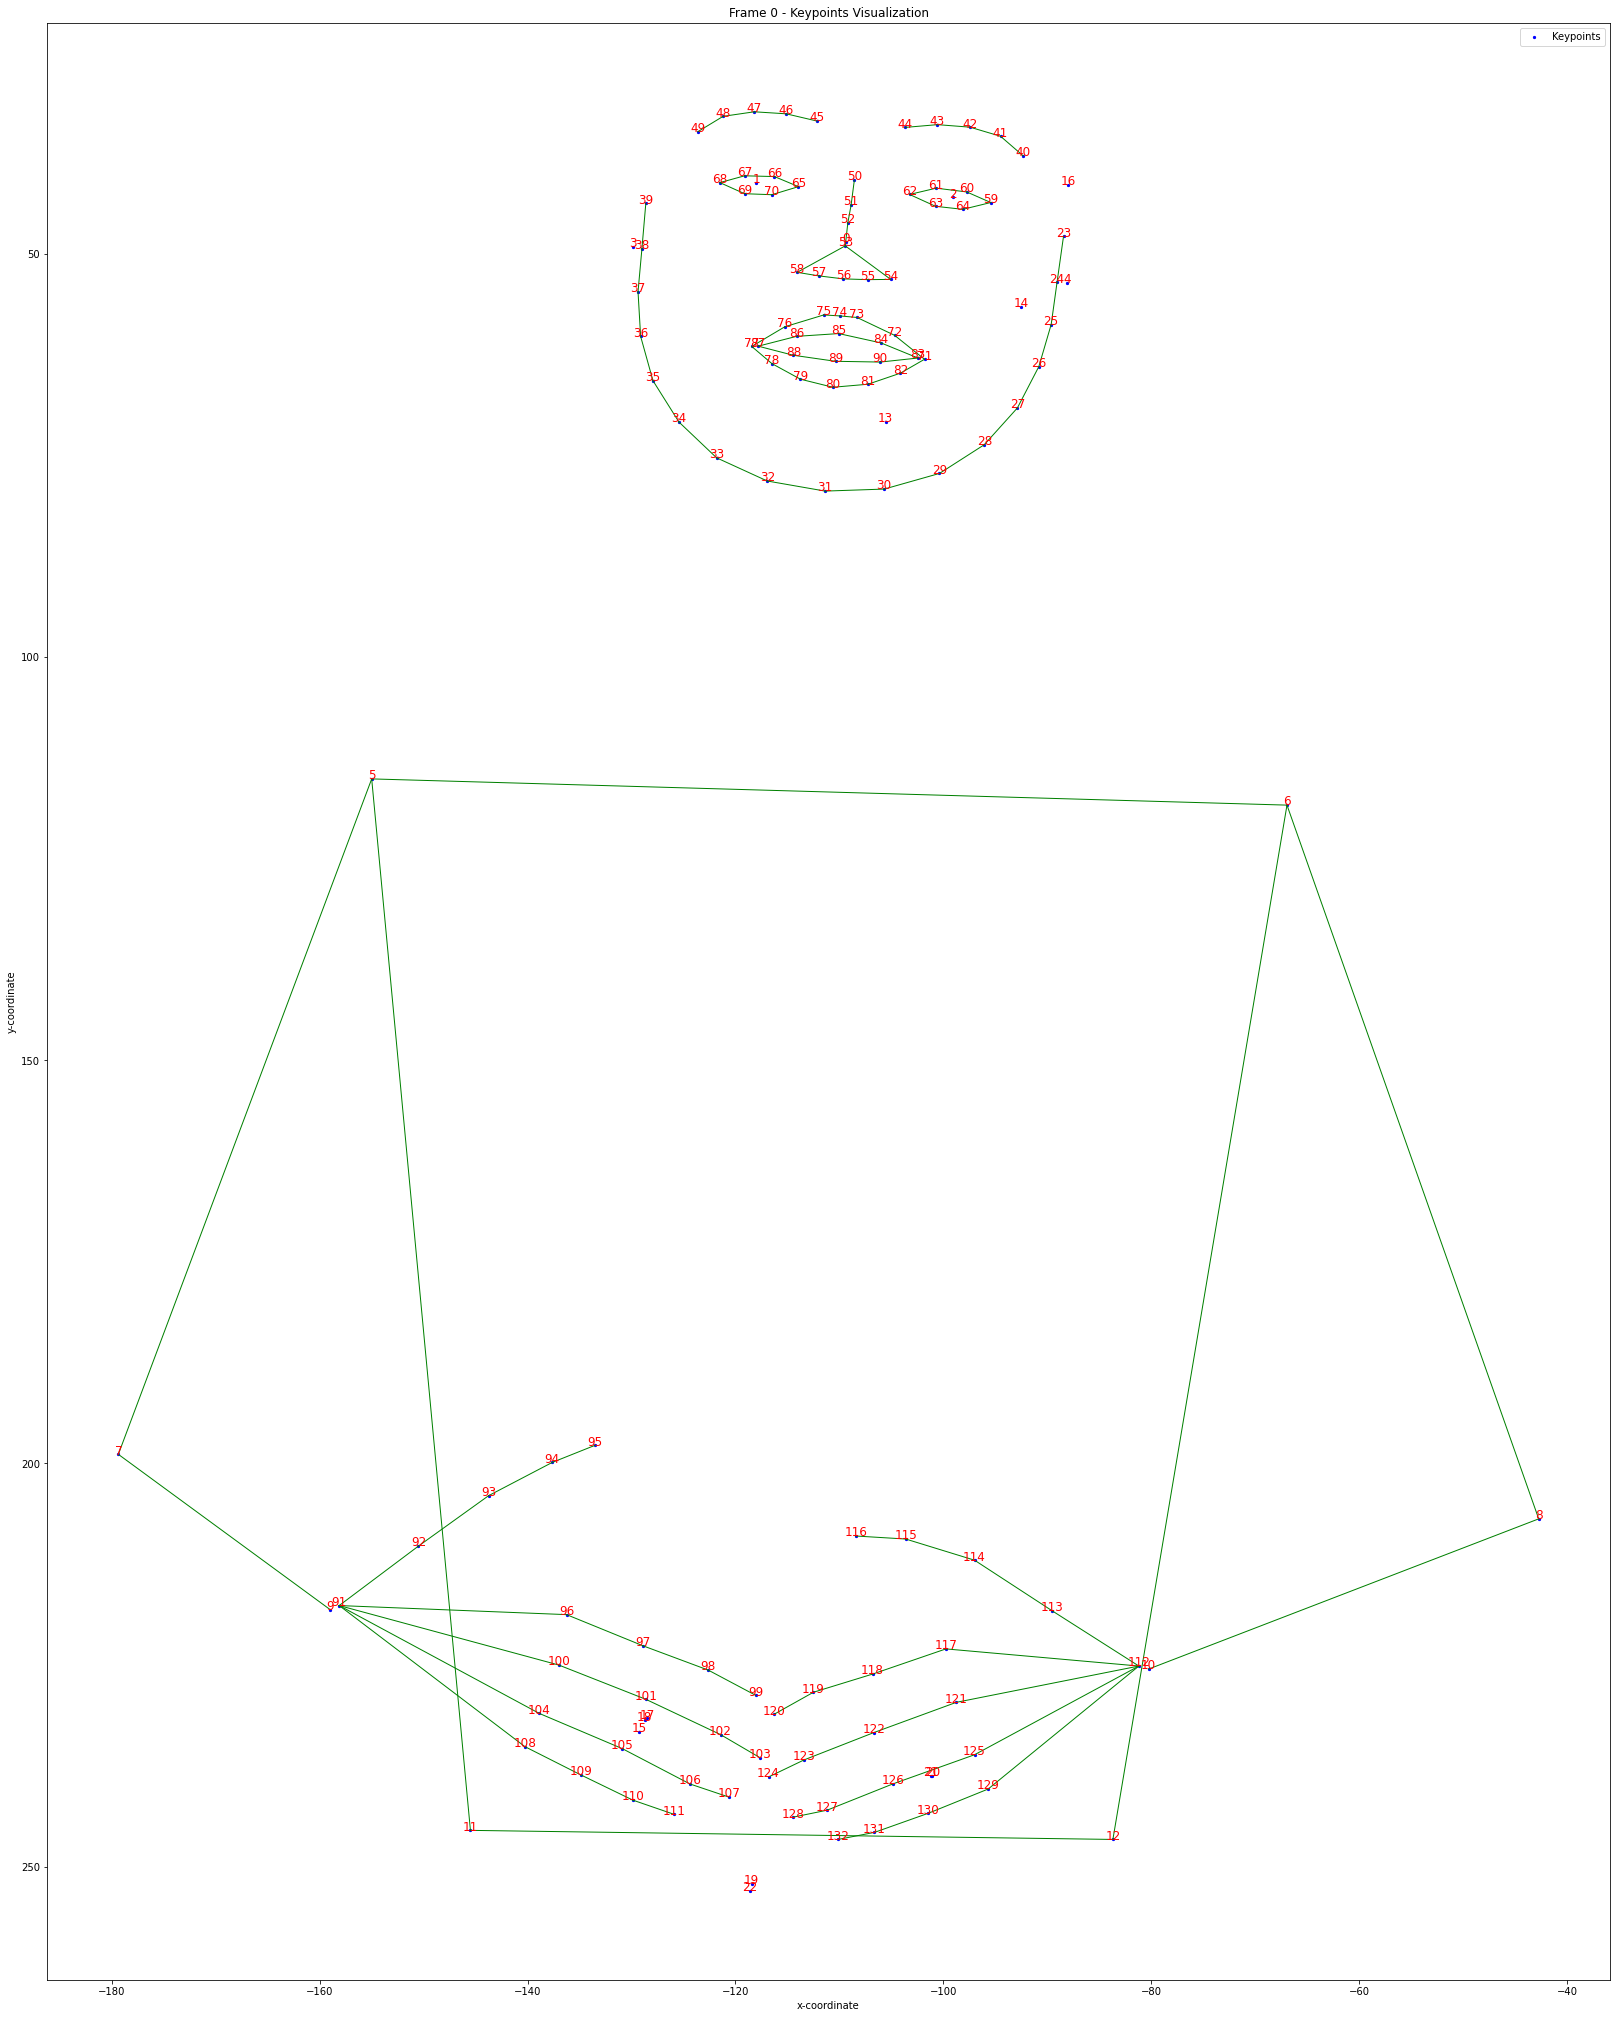

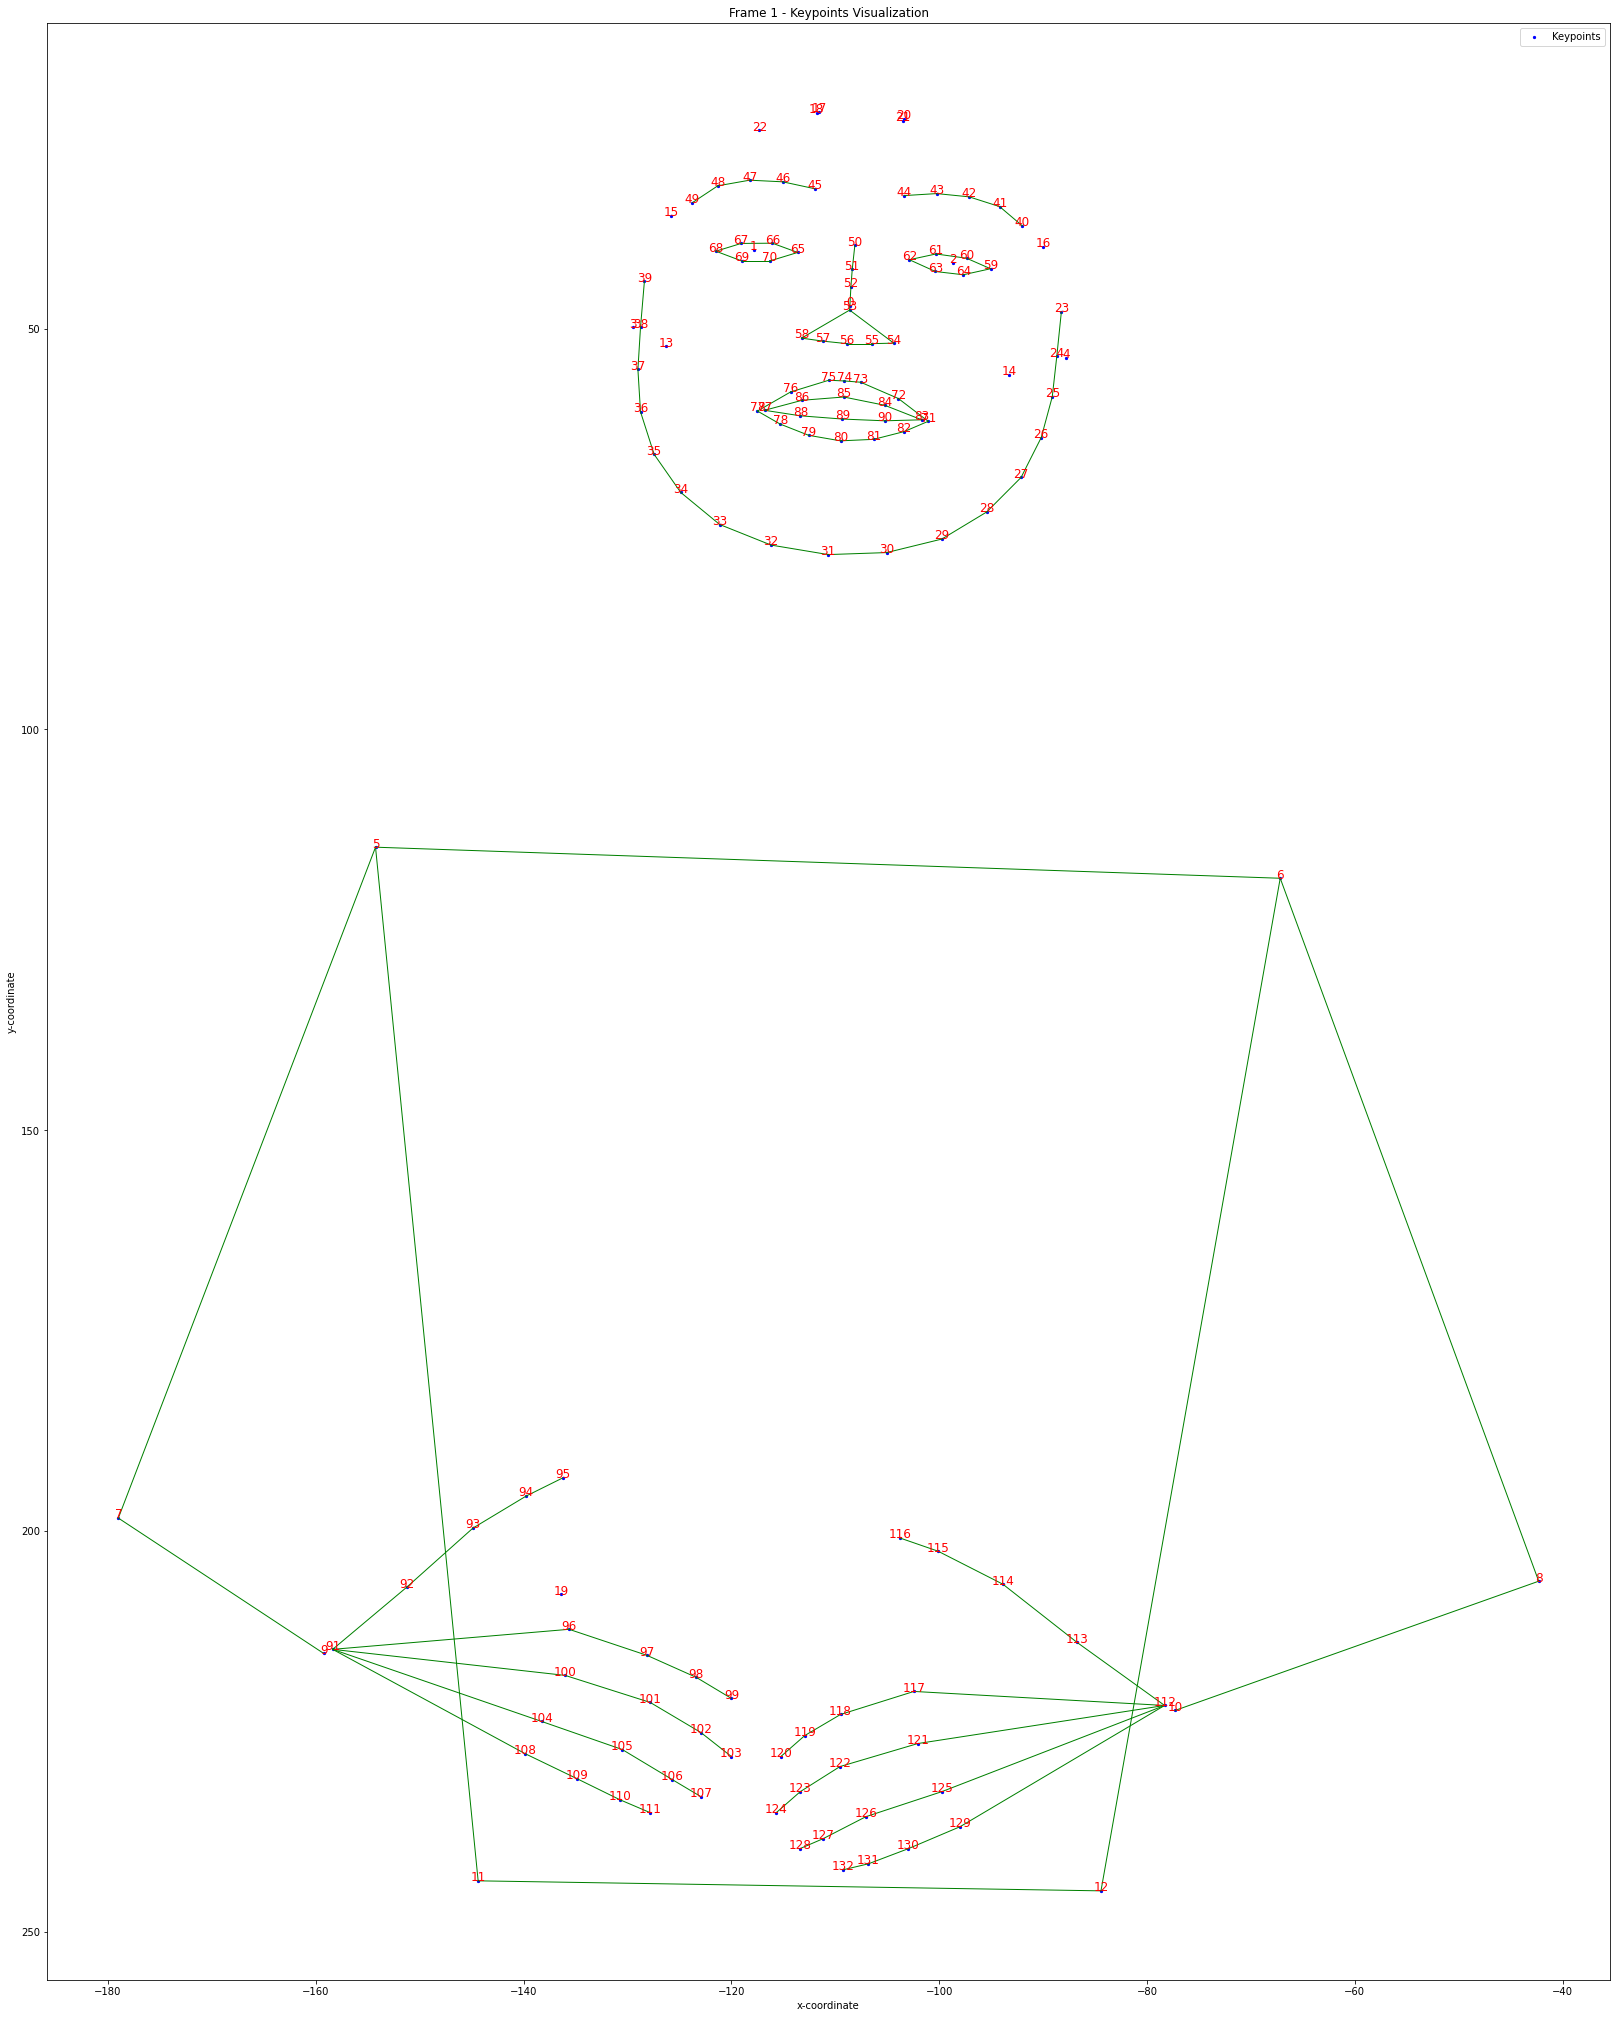

In [23]:
# Updated Skeleton Structure
SKELETON = [
    # Body connections
    #(0, 1), (0, 2), (1, 3), (2, 4),  # Head and shoulders
    (5, 6), (5, 7), (6, 8),          # Shoulders to elbows
    (7, 9), (8, 10),                 # Elbows to wrists
    (5, 11), (6, 12), (11, 12),      # Torso
    #(11, 13), (12, 14),              # Hips to knees
    #(13, 15), (14, 16),              # Knees to ankles

    #Left eyes
    (59,60), (60, 61), (61, 62), (62,63), (63, 64), (64, 59),
    
     # Eye brows
    (45, 46), (46, 47), (47, 48), (48, 49),

    #Right eyes
    (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 65),

    #Eye brows
    (40,41), (41,42), (42,43), (43,44),

    #Mouth
    (71,72), (72,73),(73,74), (74,75), (75,76), (76,77), (77,78), (78,79), (79,80), (80,81), (81,82), (82,71),

    #Mouth inner
    (83,84), (84,85), (85,86), (86,87), (87,88), (88,89), (89,90), (90, 83),


    #Nouse
    (50, 51), (51,52), (52,53), (53, 54), (54,55), (55,56), (56,57), (57,58), (58,53),

    #Face 
    (23,24), (24,25), (25,26), (26,27), (27,28), (28,29), (29,30), (30,31), (31,32), (32,33), (33,34), (34,35), (35,36), (36,37), (37,38), (38,39), 

    # Right Hand Connections
    (91, 92), (92, 93), (93, 94), (94, 95),  # Thumb
    (91, 96), (96, 97), (97, 98), (98, 99),  # Index finger
    (91, 100), (100, 101), (101, 102), (102, 103),  # Middle finger
    (91, 104), (104, 105), (105, 106), (106, 107),  # Ring finger
    (91, 108), (108, 109), (109, 110), (110, 111),  # Little finger

    # Left Hand Connections
    (112, 113), (113, 114), (114, 115), (115, 116),  # Thumb
    (112, 117), (117, 118), (118, 119), (119, 120),  # Index finger
    (112, 121), (121, 122), (122, 123), (123, 124),  # Middle finger
    (112, 125), (125, 126), (126, 127), (127, 128),  # Ring finger
    (112, 129), (129, 130), (130, 131), (131, 132)   # Little finger
]

# Function to rotate keypoints by 180 degrees
def rotate_keypoints_180(keypoints):
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]  # Invert x
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]  # Invert y
    return rotated_keypoints

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize for a specific video file
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Iterate through each frame, limit to first 10 frames
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):  # Limit to first 10 frames
            # Rotate the keypoints by 180 degrees
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)

            # Create the plot
            plt.figure(figsize=(28, 36))

            # Plot rotated keypoints (in blue)
            plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='blue', s=5, label='Keypoints')

            # Add numbers for each keypoint
            for i, (x, y, c) in enumerate(rotated_keypoints):
                plt.text(x, -y, f'{i}', fontsize=12, color='red', ha='center')  # Number each keypoint

            # Add bonds based on the skeleton structure
            for joint_start, joint_end in SKELETON:
                x_start, y_start = rotated_keypoints[joint_start, 0], -rotated_keypoints[joint_start, 1]
                x_end, y_end = rotated_keypoints[joint_end, 0], -rotated_keypoints[joint_end, 1]
                plt.plot([x_start, x_end], [y_start, y_end], color='green', linewidth=1)

            # Customize plot
            plt.title(f"Frame {frame_index} - Keypoints Visualization")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment

            # Show the plot
            plt.show()
        
        # Break out of the loop after visualizing the first 10 frames
        break
